Index(['Charged Off', 'Current', 'Does not meet the credit policy',
       'Fully Paid', 'Late', 'Unknown'],
      dtype='object')
0    1
1    1
2    1
3    3
4    1
Name: grade, dtype: int64
0    1
1    1
2    1
3    3
4    1
Name: grade, dtype: int64


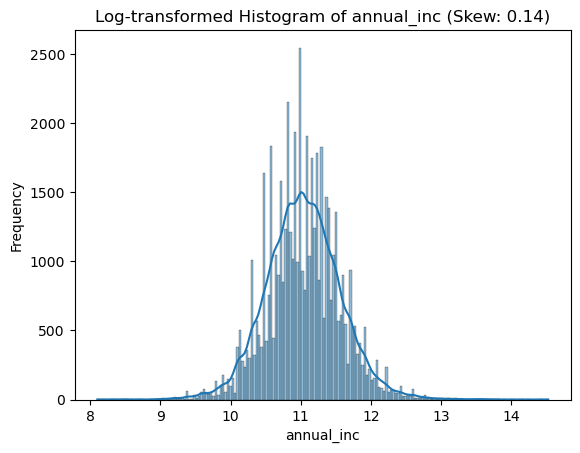

New skewness of annual_inc: 0.14


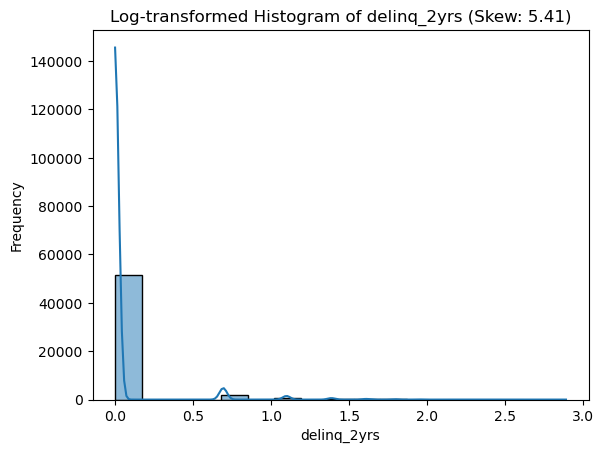

New skewness of delinq_2yrs: 5.41


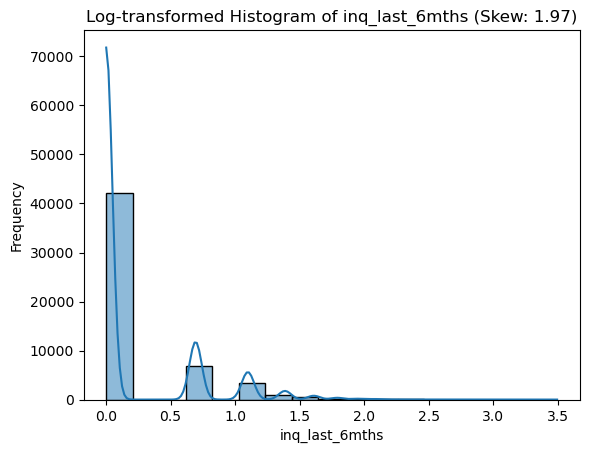

New skewness of inq_last_6mths: 1.97


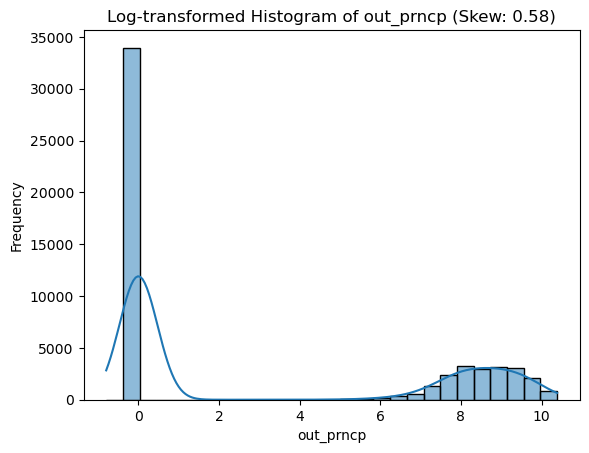

New skewness of out_prncp: 0.58


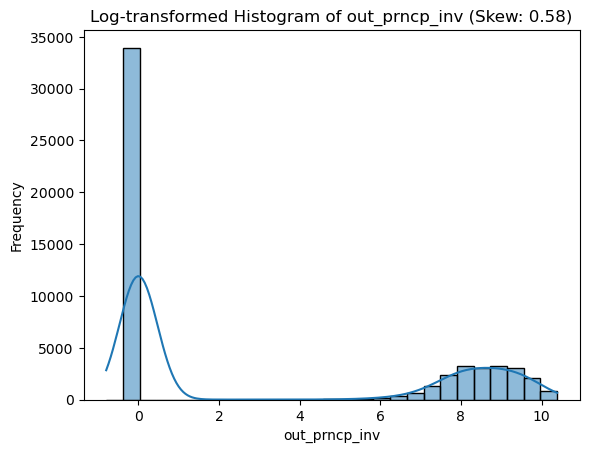

New skewness of out_prncp_inv: 0.58


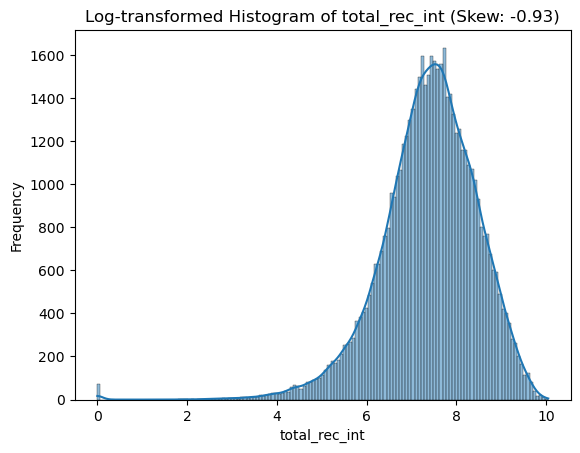

New skewness of total_rec_int: -0.93


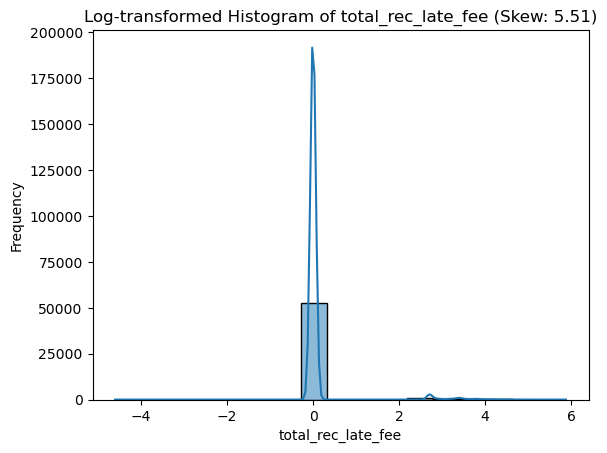

New skewness of total_rec_late_fee: 5.51


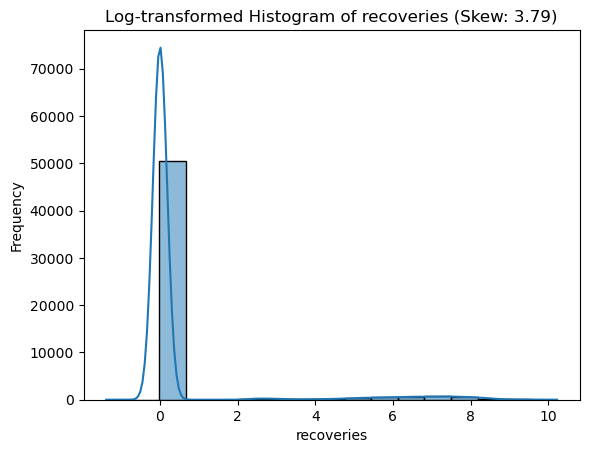

New skewness of recoveries: 3.79


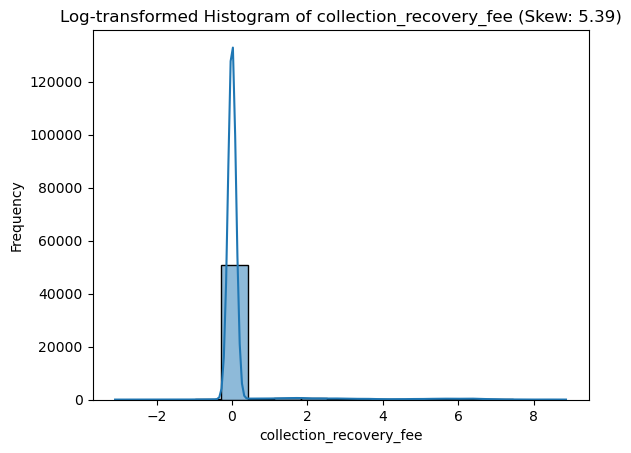

New skewness of collection_recovery_fee: 5.39


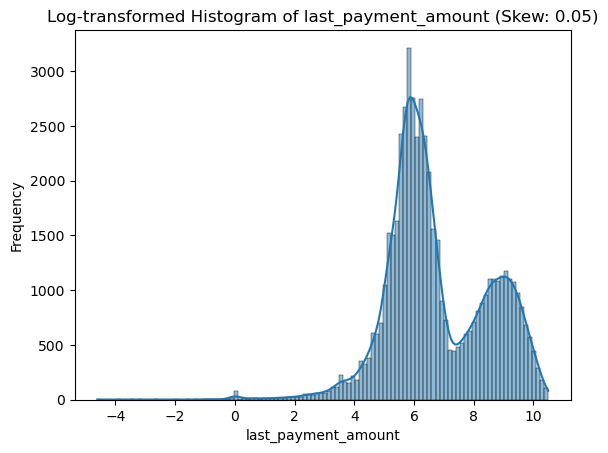

New skewness of last_payment_amount: 0.05
Applied Box-Cox transformation to 'loan_amount'.


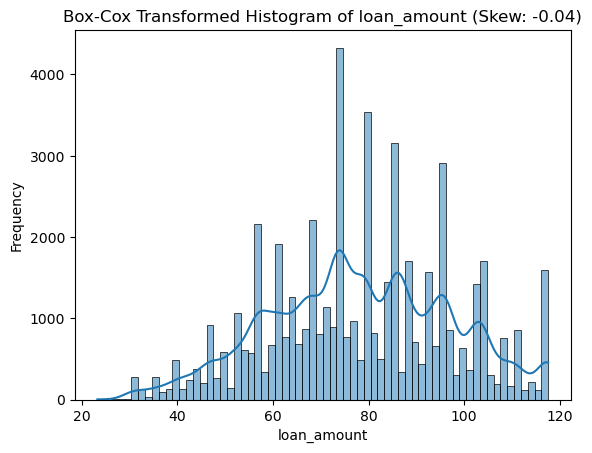

New skewness of loan_amount: -0.04
Applied Box-Cox transformation to 'funded_amount'.


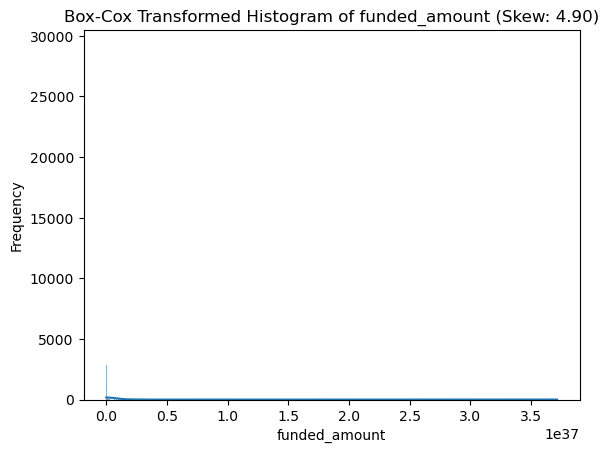

New skewness of funded_amount: 4.90
Adjusting 'funded_amount_inv' by adding 1.0 to make all values positive.
Applied Box-Cox transformation to 'funded_amount_inv'.


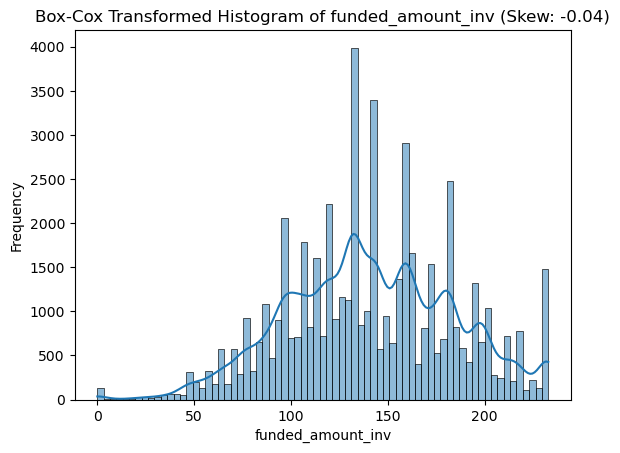

New skewness of funded_amount_inv: -0.04


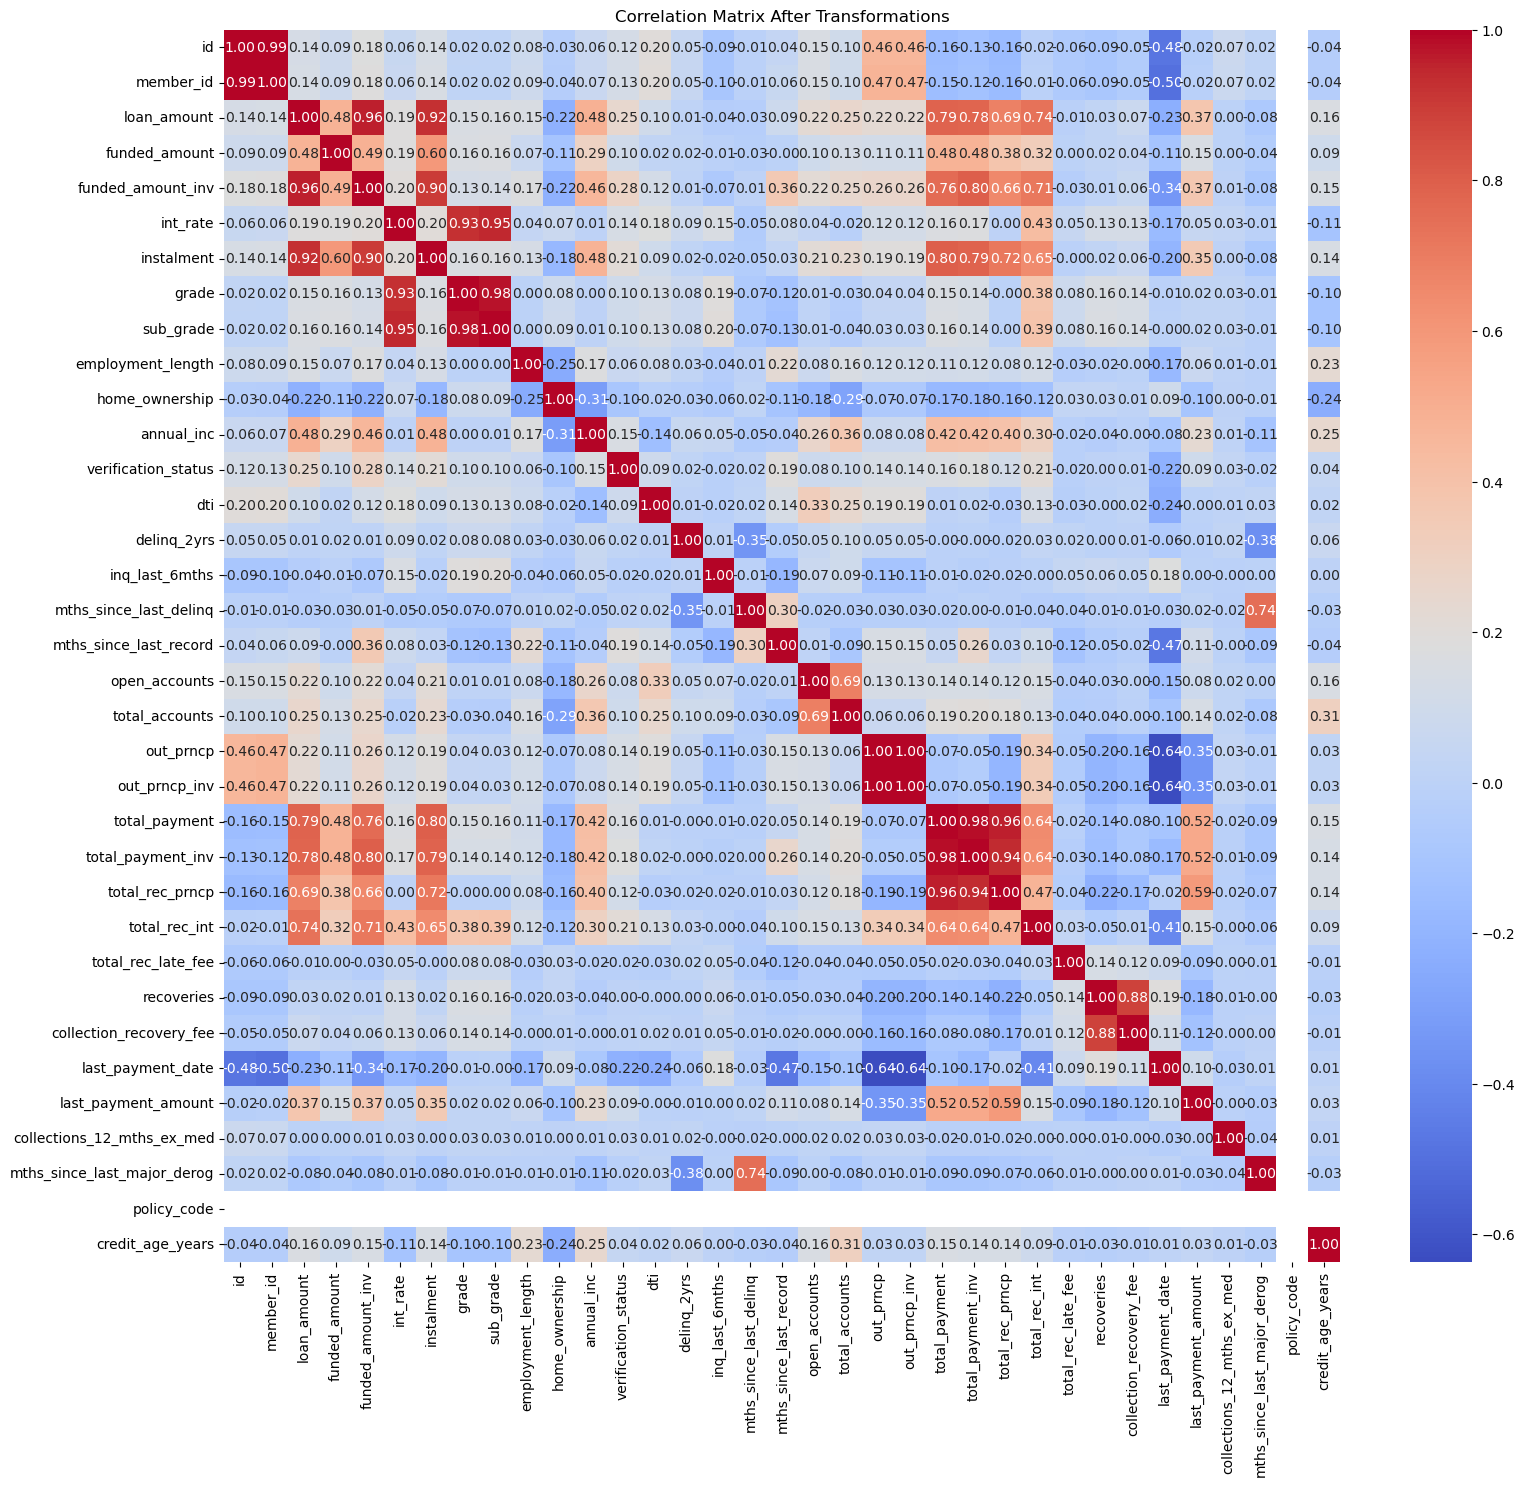

Severe Skewed Columns:


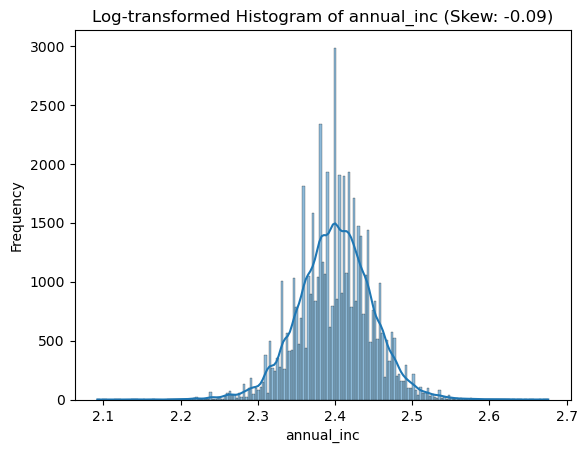

New skewness of annual_inc: -0.09


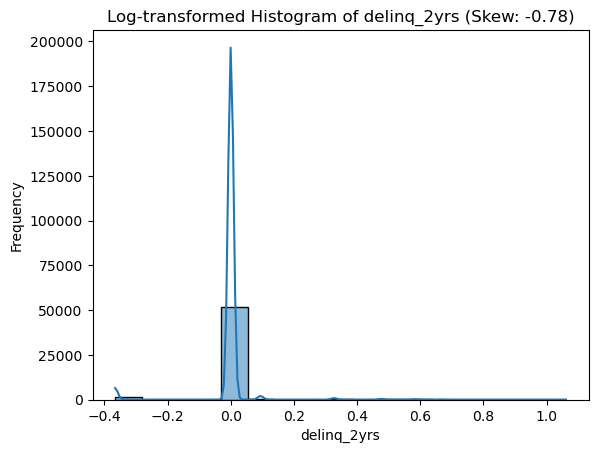

New skewness of delinq_2yrs: -0.78


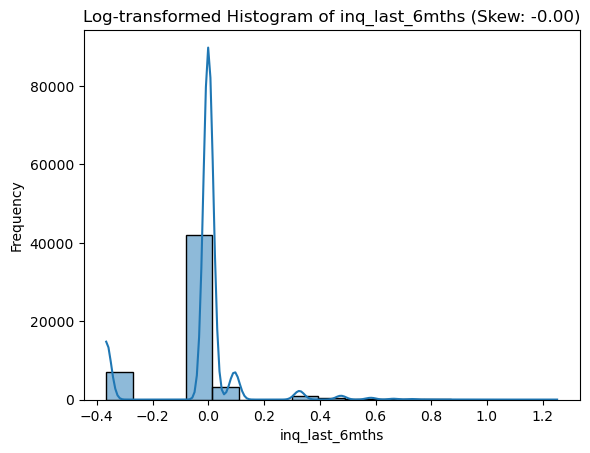

New skewness of inq_last_6mths: -0.00


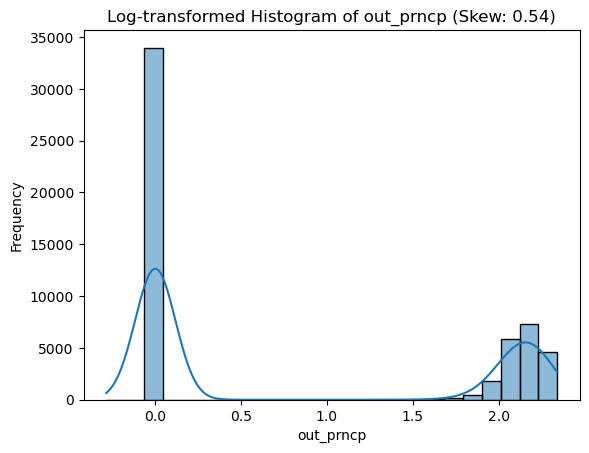

New skewness of out_prncp: 0.54


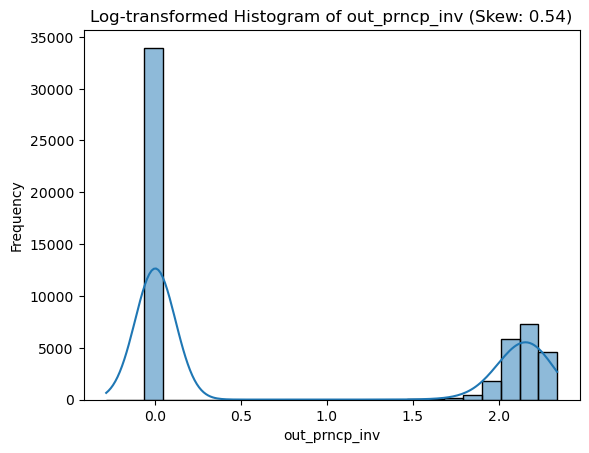

New skewness of out_prncp_inv: 0.54


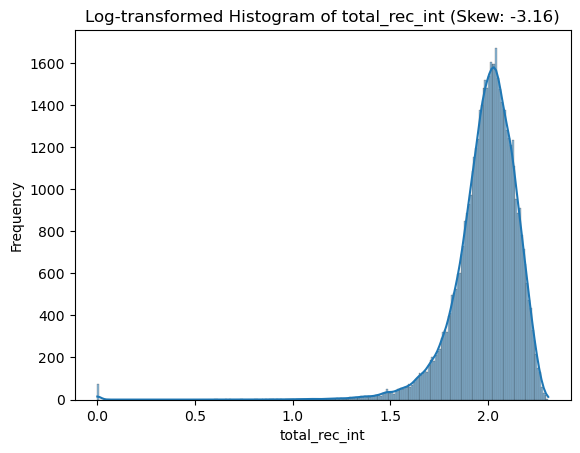

New skewness of total_rec_int: -3.16


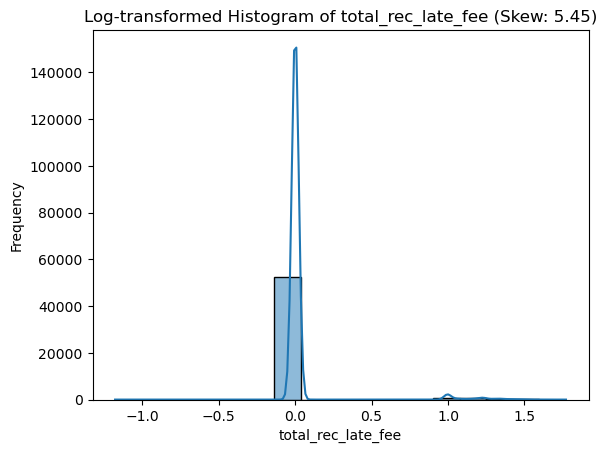

New skewness of total_rec_late_fee: 5.45


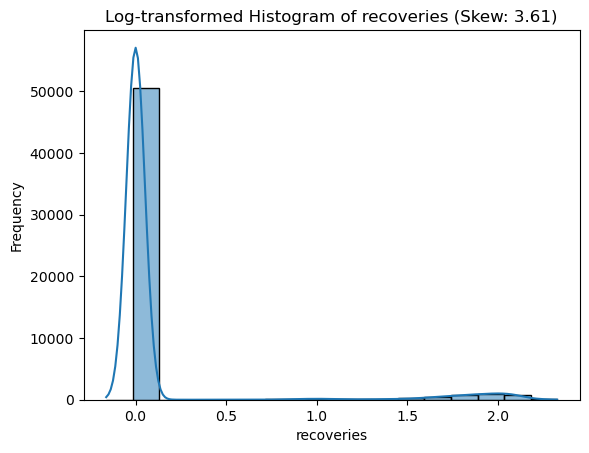

New skewness of recoveries: 3.61


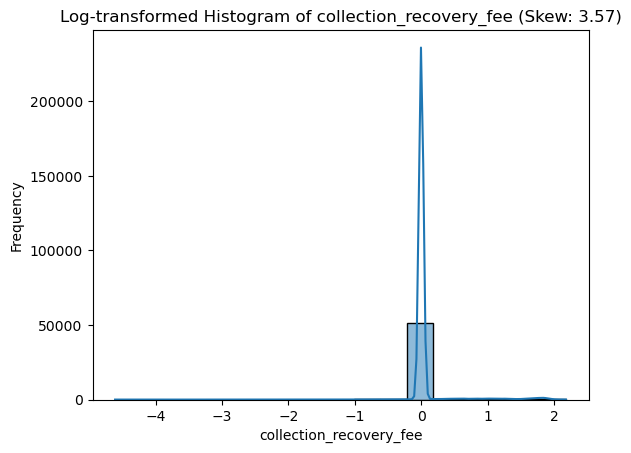

New skewness of collection_recovery_fee: 3.57


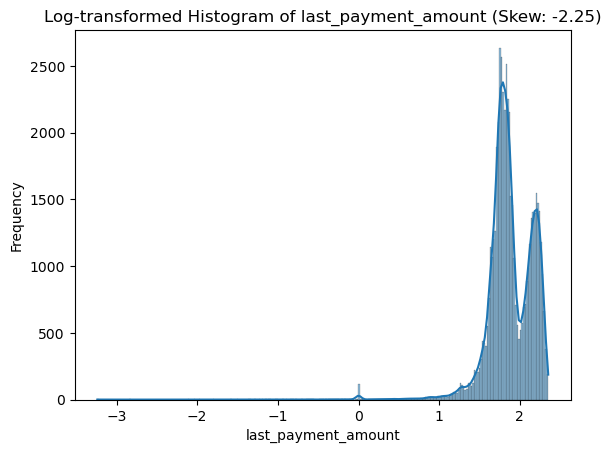

New skewness of last_payment_amount: -2.25

Moderate Skewed Columns:
Applied Box-Cox transformation to 'loan_amount'.


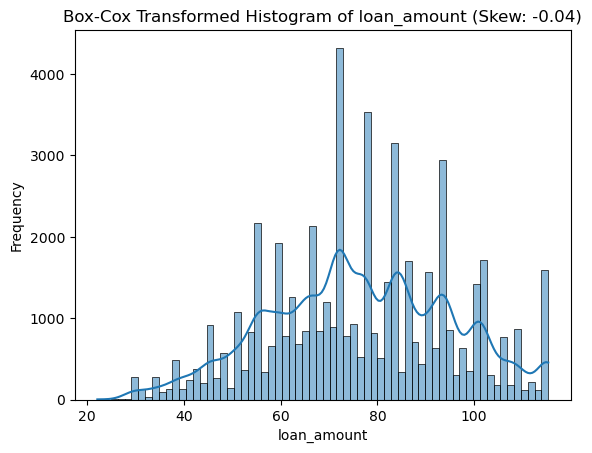

New skewness of loan_amount: -0.04
Applied Box-Cox transformation to 'funded_amount'.


/Users/charliesmith/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:922: RuntimeWarning:

overflow encountered in power



ValueError: array must not contain infs or NaNs

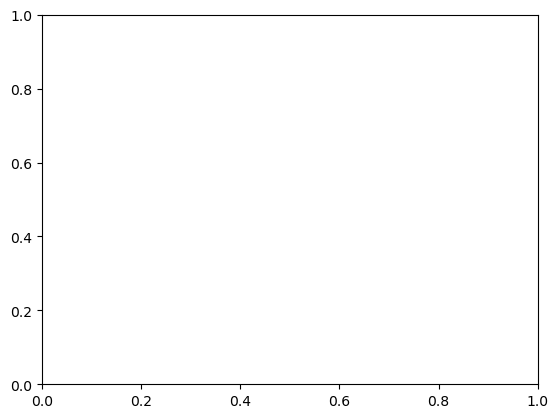

In [11]:
# Import necessary libraries
import pandas as pd
import importlib
import data_cleaning
import data_analysis
import matplotlib.pyplot as plt
import seaborn as sns
from data_cleaning import DataTransform
from data_analysis import DataFrameTransform
from scipy.stats import boxcox

# Reload the modules
importlib.reload(data_cleaning)
importlib.reload(data_analysis)

# Read the data
data_frame = pd.read_csv('loan_payments.csv')

# Step 1: Clean and transform the data
# Create an instance of the DataTransform class
transformer = DataTransform(data_frame)

# Apply the conversion methods to clean the data
data_frame = transformer.convert_sub_grade()
data_frame = transformer.convert_grade()
data_frame = transformer.convert_employment_length()
data_frame = transformer.convert_home_ownership()
data_frame = transformer.convert_issue_date()
data_frame = transformer.convert_last_payment_date()
data_frame = transformer.convert_last_credit_pull_date()
data_frame = transformer.convert_verification_status()
data_frame = transformer.convert_earliest_credit_line()

# Step 2: Analyze the data for skewness and transformations
# Create an instance of DataFrameTransform with the cleaned DataFrame
df_transform = DataFrameTransform(data_frame)

# Apply log transformation to columns with severe skewness
df_transform.log_transform_severe_skew()

# Apply Box-Cox transformation to columns with moderate skewness
df_transform.box_cox_transform_moderate_skew()

# Step 3: Plot and review results
# Plot the correlation matrix after transformations
correlation_matrix = data_frame.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Transformations')
plt.show()

# Perform analysis using DataFrameTransform
analysis = DataFrameTransform(data_frame)

# Print severe skewed columns
print("Severe Skewed Columns:")
analysis.log_transform_severe_skew()

# Print moderate skewed columns
print("\nModerate Skewed Columns:")
analysis.box_cox_transform_moderate_skew()

In [ ]:
# Import required modules
import pandas as pd
from data_cleaning import DataTransform
from data_analysis import Plotter, DataFrameTransform

# Load the dataset
data_frame = pd.read_csv('loan_payments.csv')

In [ ]:
# Initialize the transformation class
transformer = DataFrameTransform(data_frame)

# Apply log transformation for severe skewness
print("Applying log transformation to columns with severe skewness...")
transformer.log_transform_severe_skew()

# Apply Box-Cox transformation for moderate skewness
print("Applying Box-Cox transformation to columns with moderate skewness...")
transformer.box_cox_transform_moderate_skew()

In [ ]:
# Create an instance of the Plotter class with the updated DataFrame
plotter = Plotter(transformer.df)

# Plot histograms for specific columns to verify transformations
columns_to_plot = ['annual_inc', 'loan_amount', 'funded_amount', 'delinq_2yrs']
print("Plotting histograms for specific columns...")
for column in columns_to_plot:
    plotter.plot_histogram(column)

In [12]:
print("Plotting histograms for all numeric columns to check for outliers...")
plotter.plot_all_numeric_columns()

Plotting histograms for all numeric columns to check for outliers...


NameError: name 'plotter' is not defined

In [13]:
import importlib
import data_analysis  # Make sure the file is correctly imported
import pandas as pd

# Reload the module
importlib.reload(data_analysis)

# Create an instance of Plotter with your DataFrame
from data_analysis import Plotter
plotter = Plotter(data_frame)

In [14]:
print(dir(plotter))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'df', 'plot_all_boxplots', 'plot_all_numeric_columns', 'plot_histogram', 'plot_missing_values']


Plotting histograms for all numeric columns to check for outliers...
Plotting histogram for id


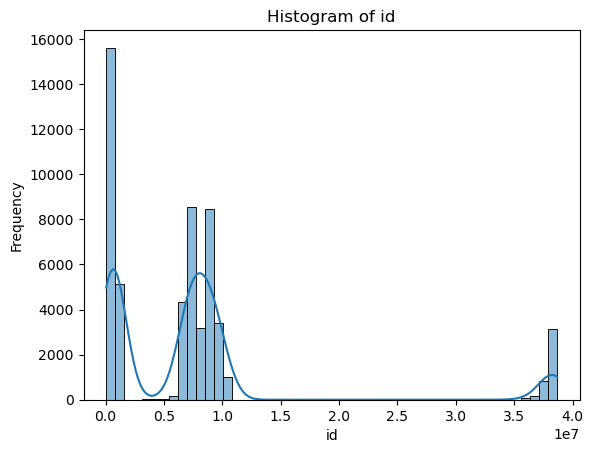

Plotting histogram for member_id


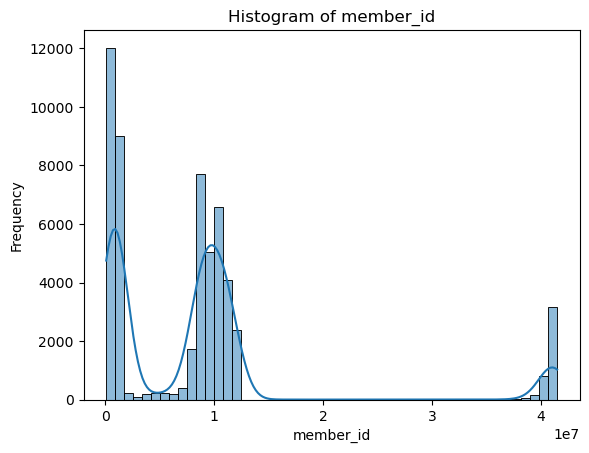

Plotting histogram for loan_amount


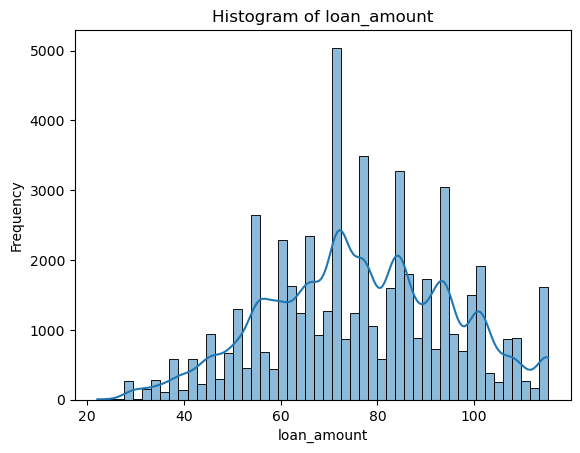

Plotting histogram for funded_amount


ValueError: array must not contain infs or NaNs

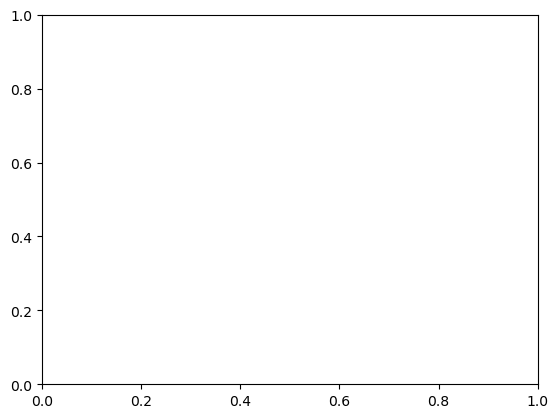

In [15]:
print("Plotting histograms for all numeric columns to check for outliers...")
plotter.plot_all_numeric_columns()

Generating box plots for all numeric columns...


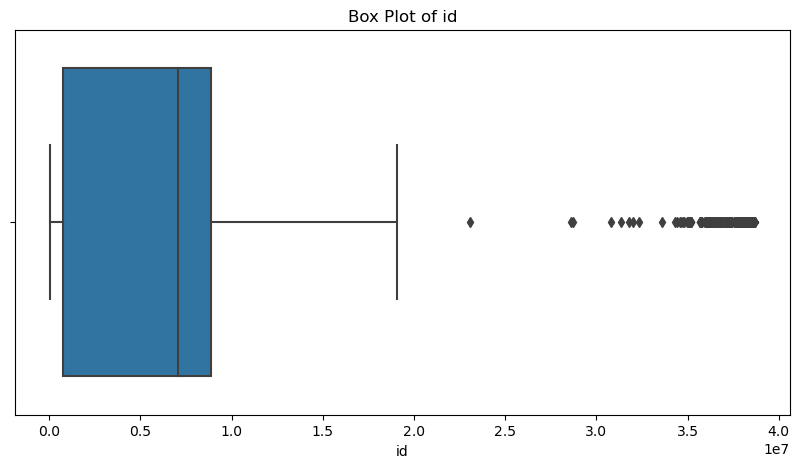

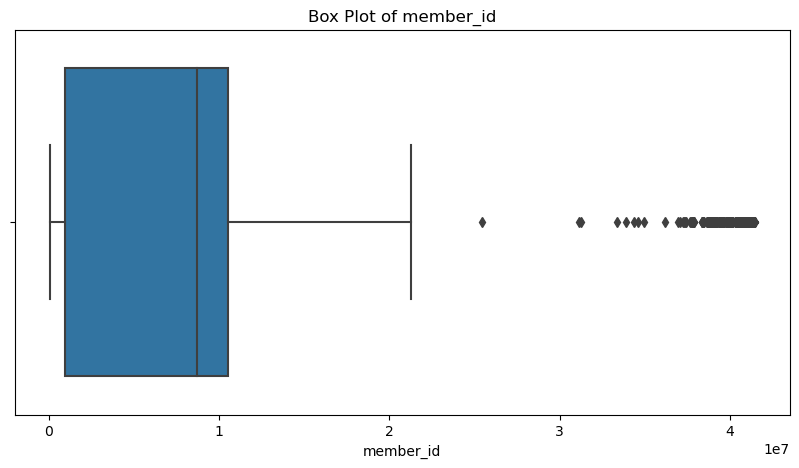

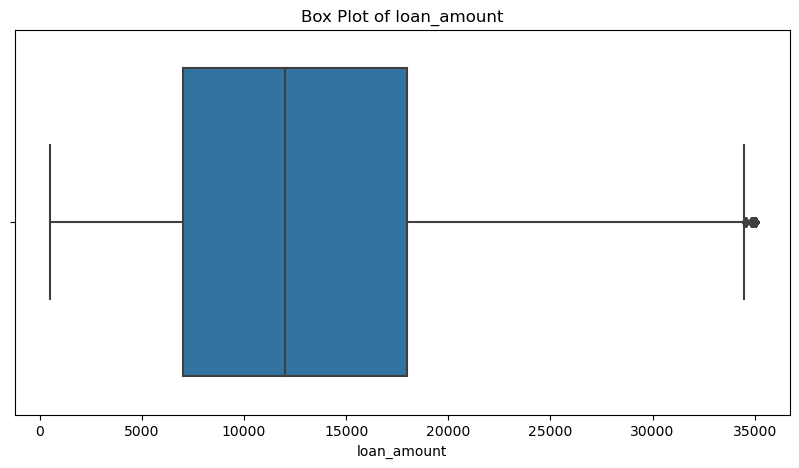

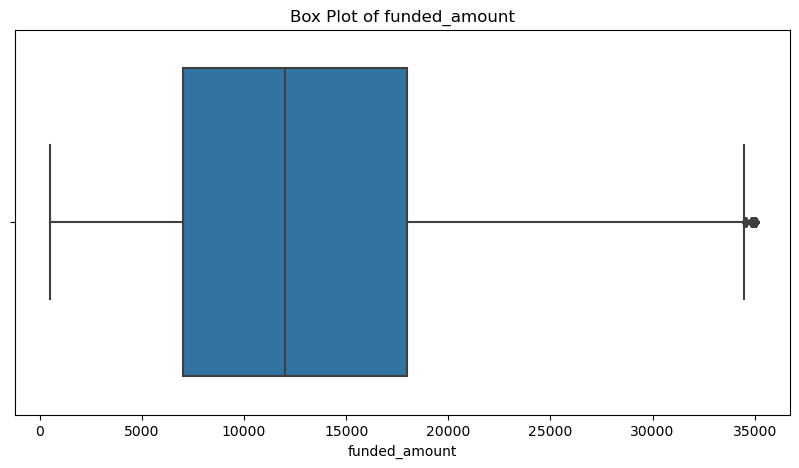

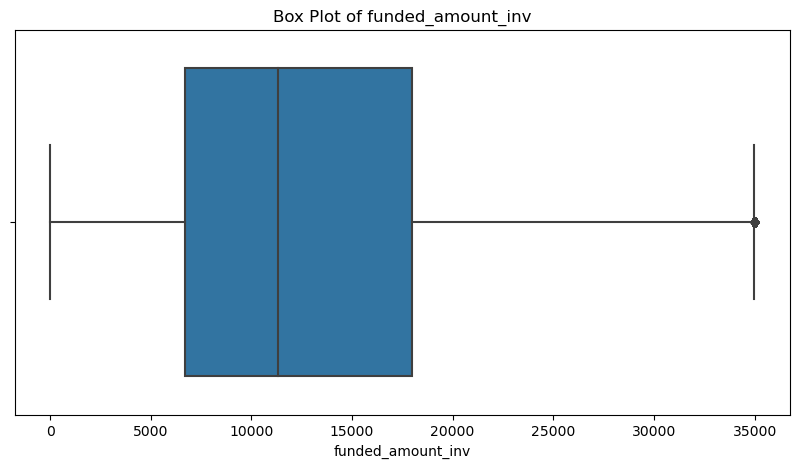

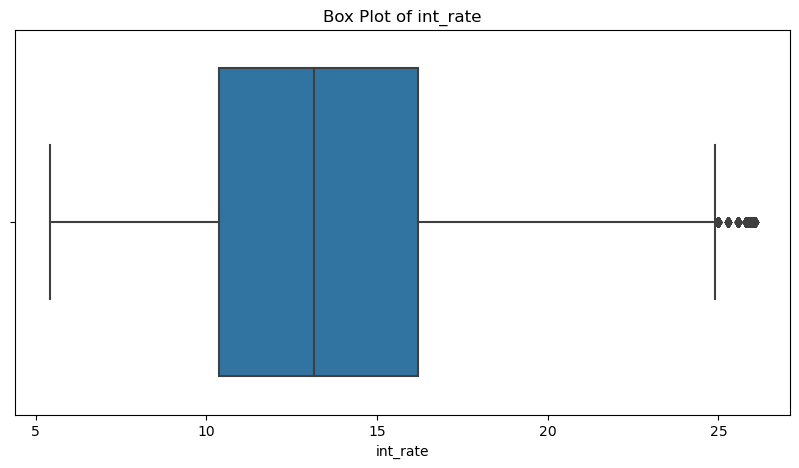

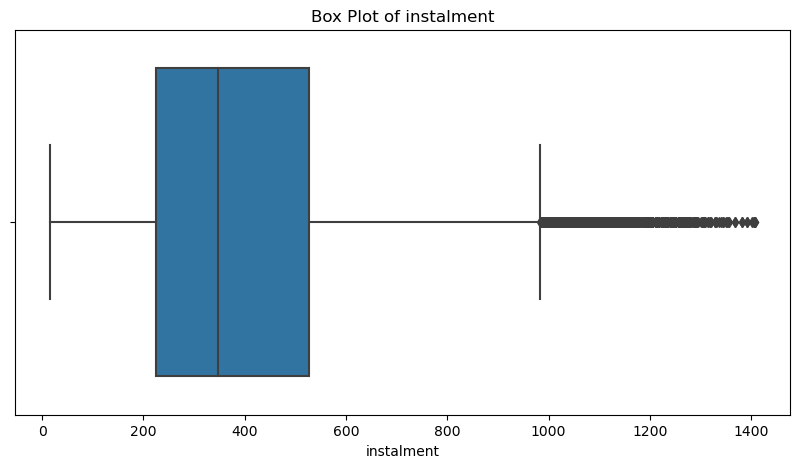

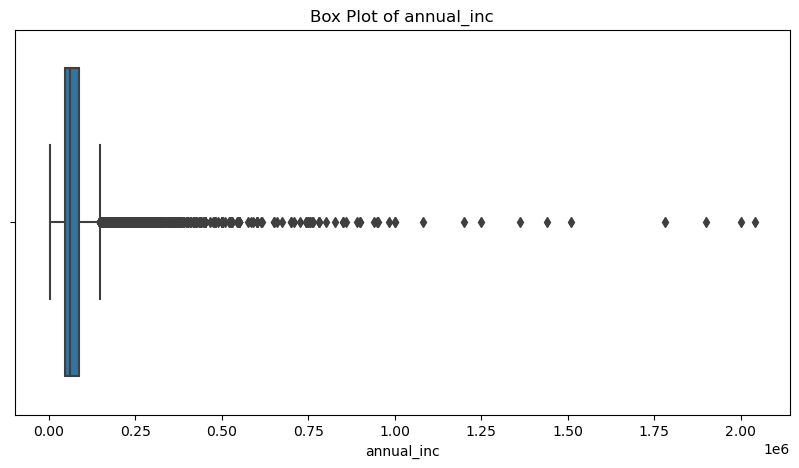

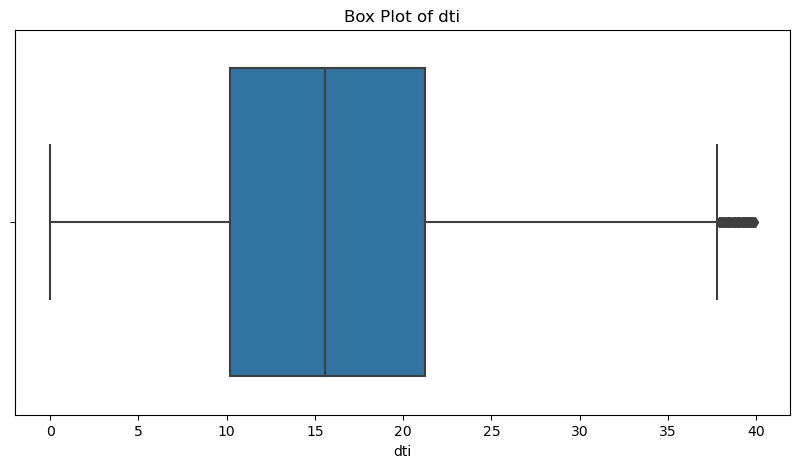

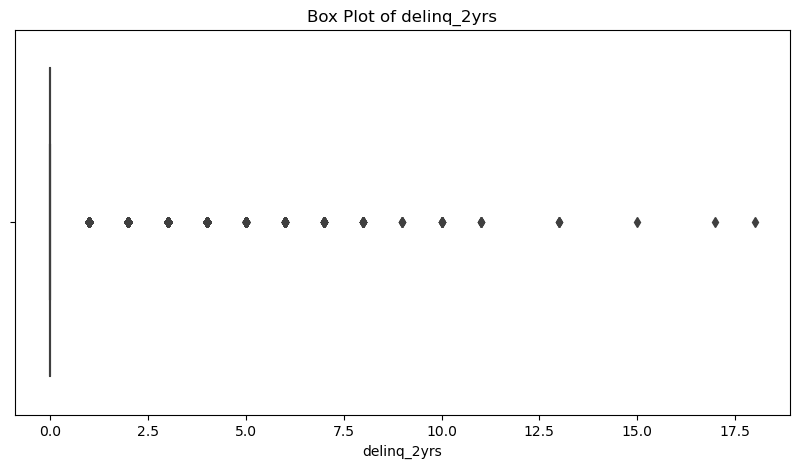

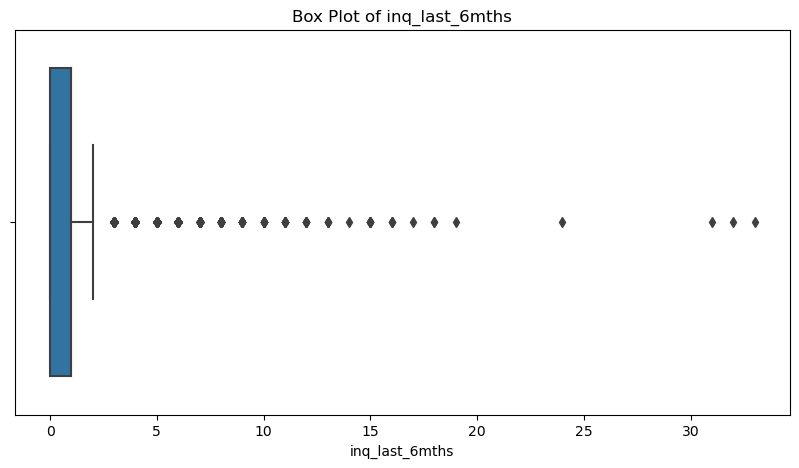

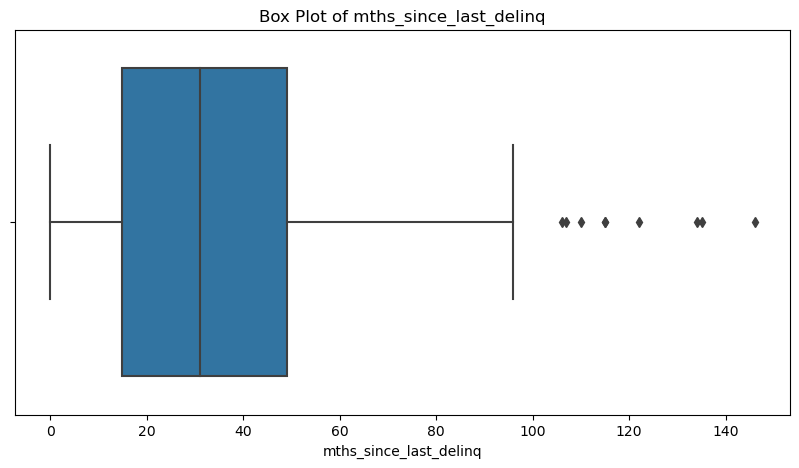

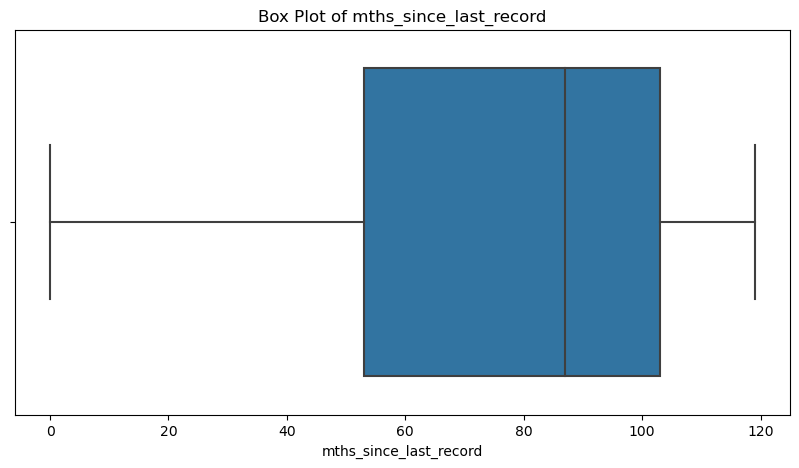

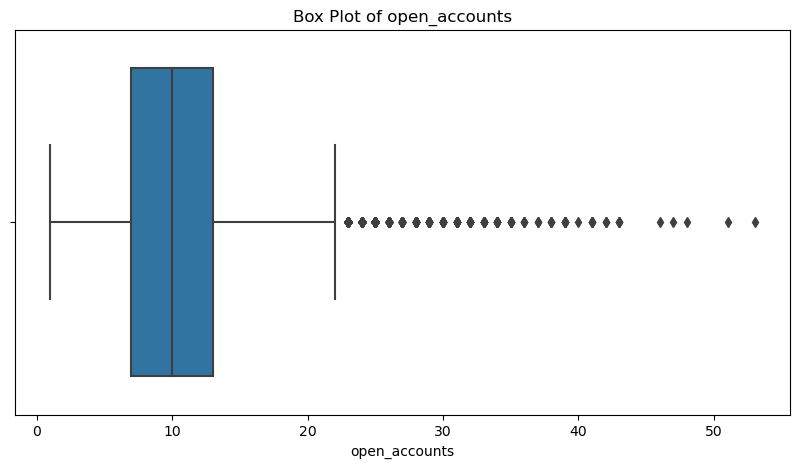

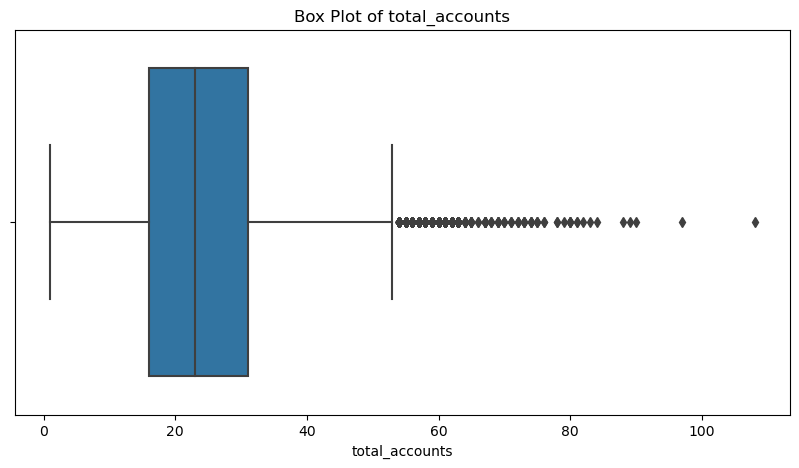

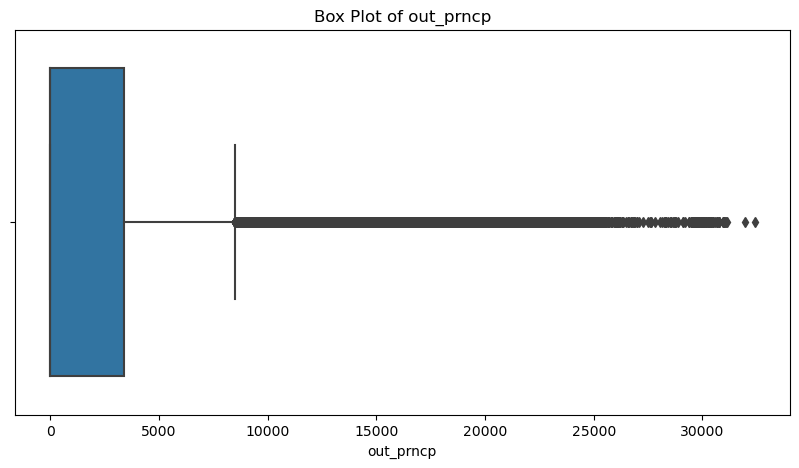

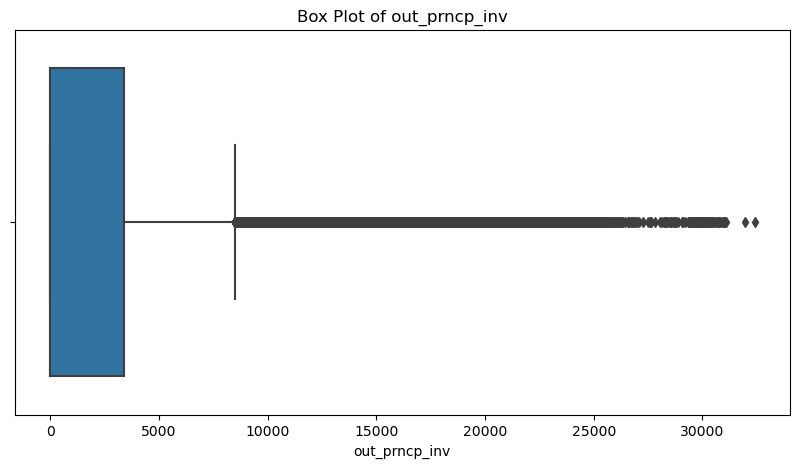

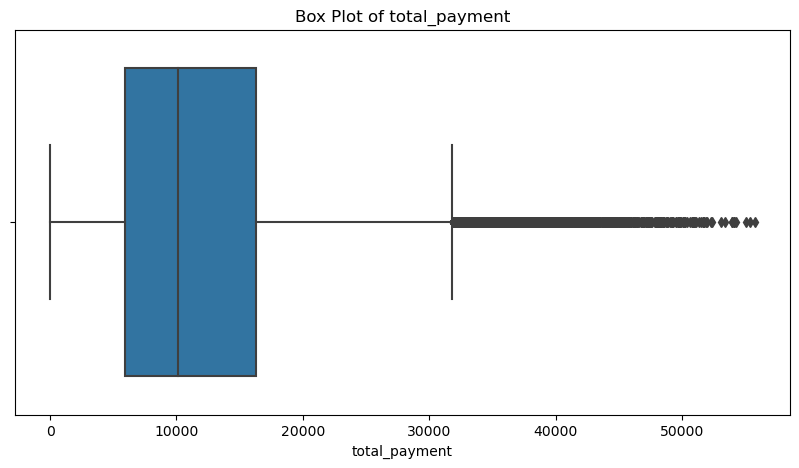

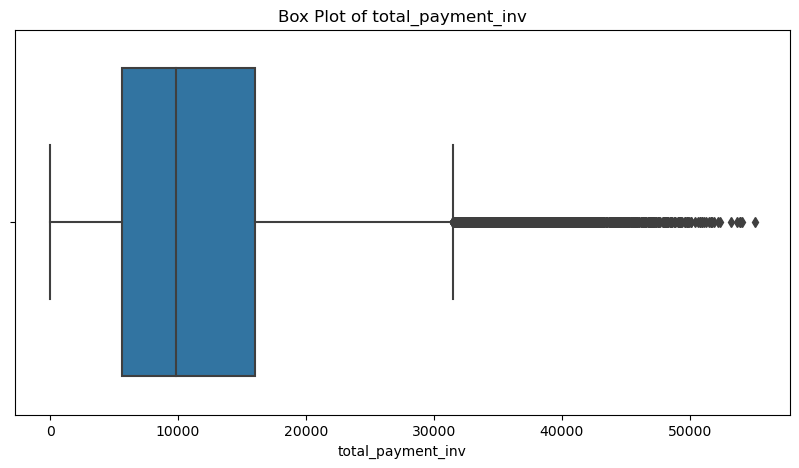

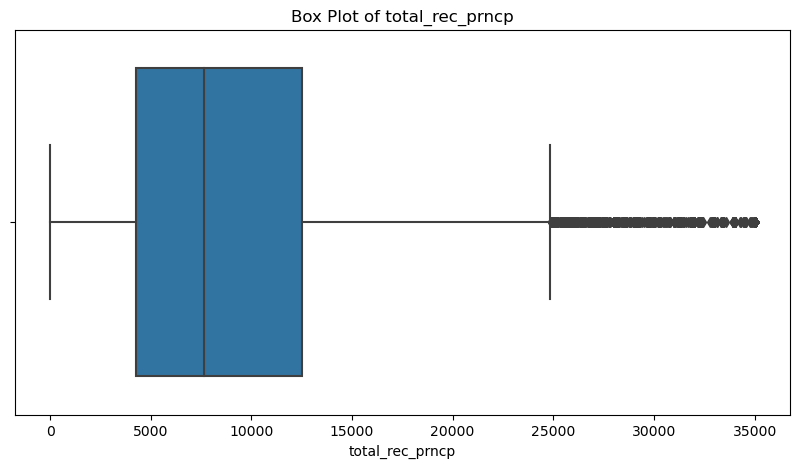

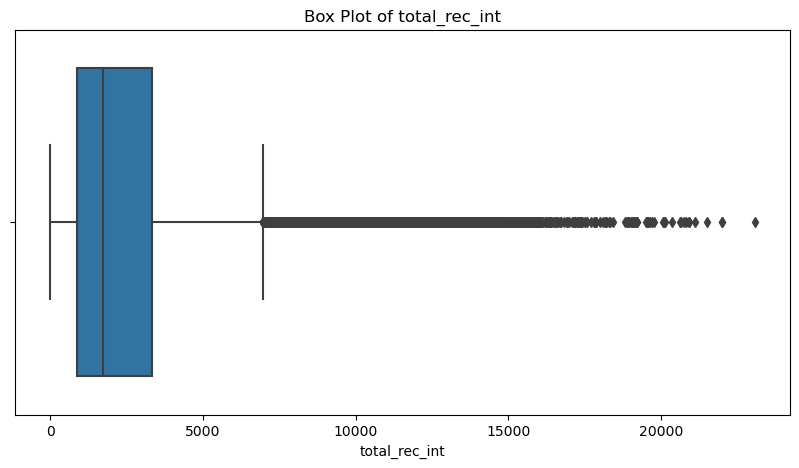

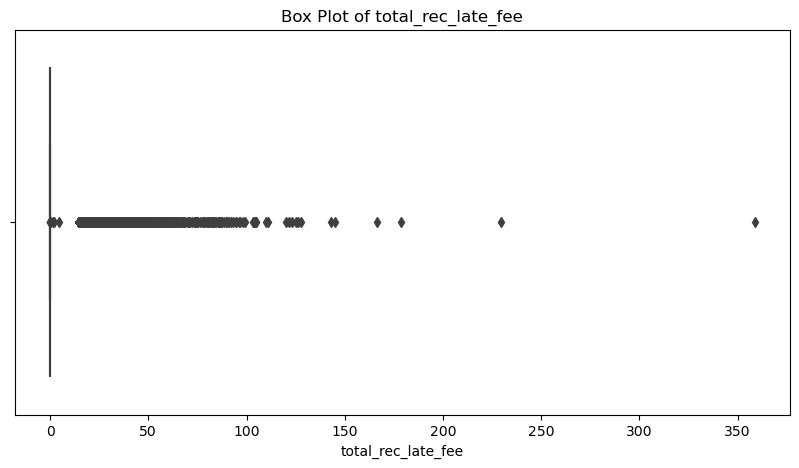

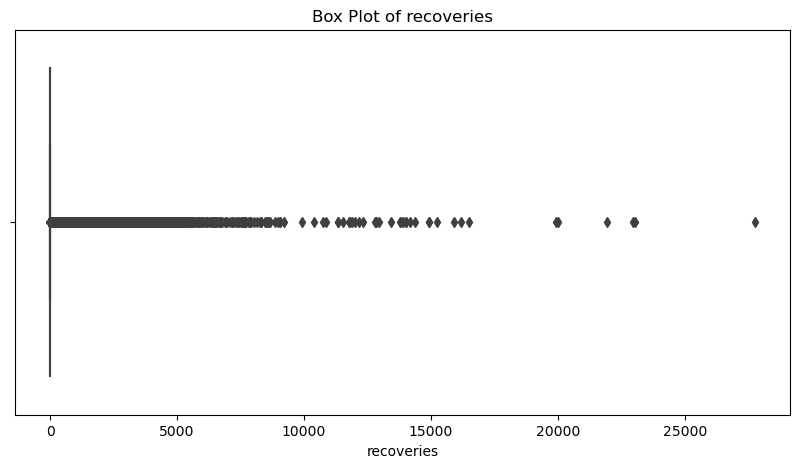

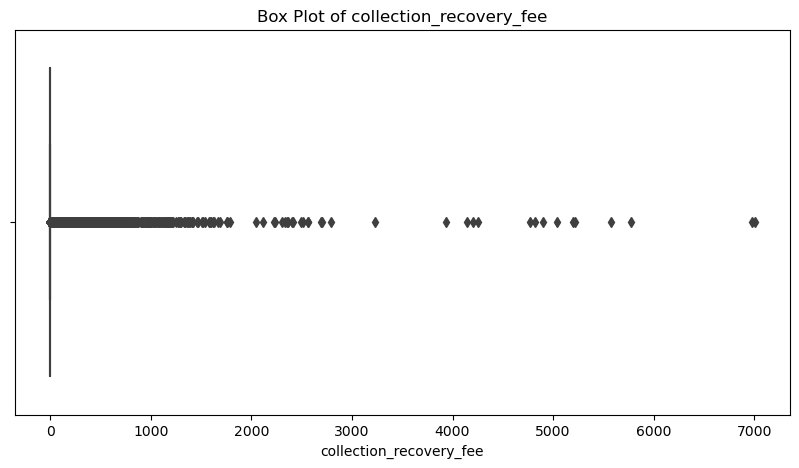

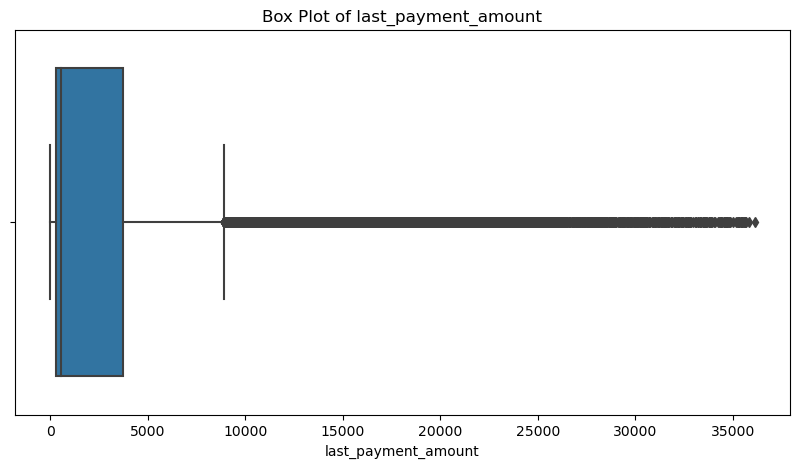

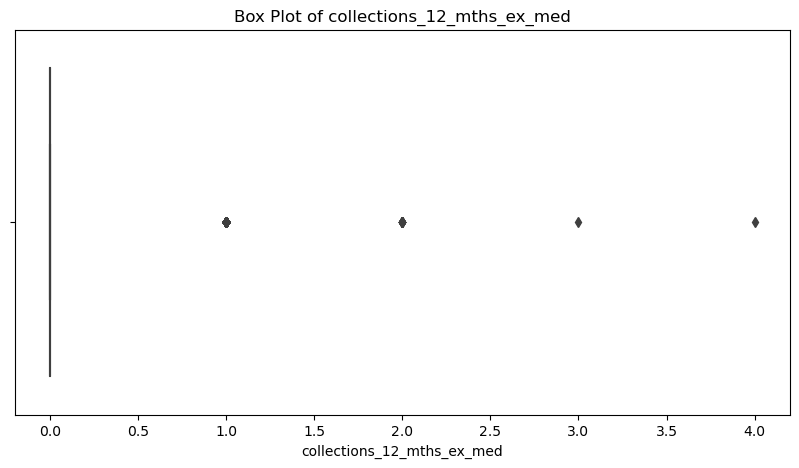

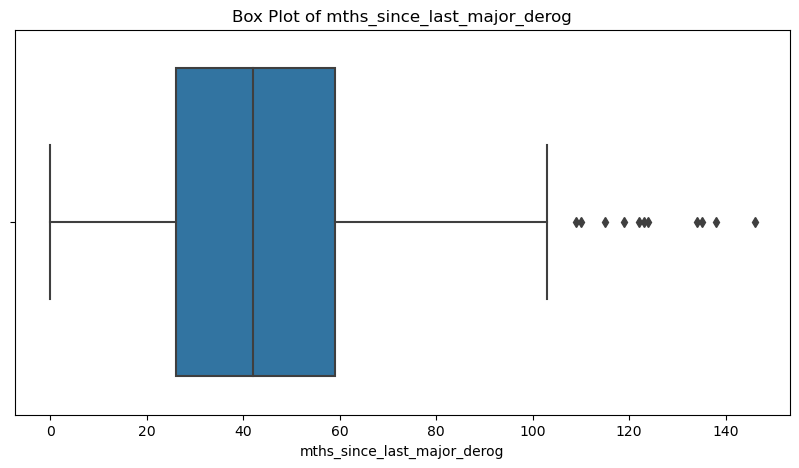

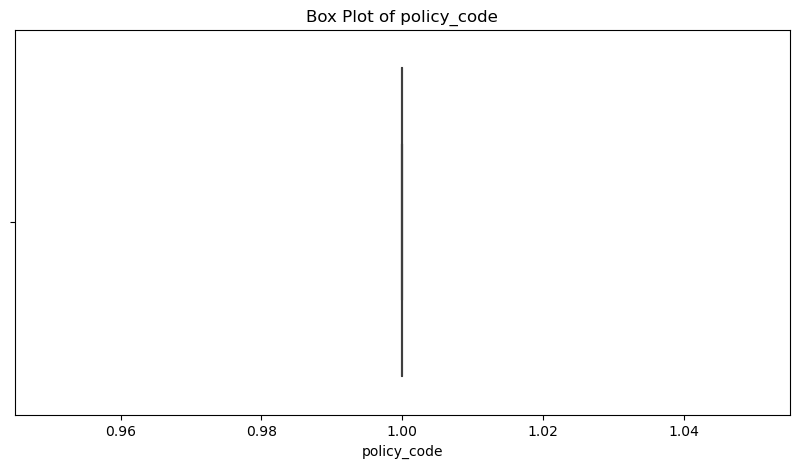

In [16]:
#Check for outliers in columns after skewness transformation
import importlib
import data_analysis
importlib.reload(data_analysis)
from data_analysis import Plotter
import pandas as pd

# Load your dataset
data_frame = pd.read_csv('loan_payments.csv')

# Create an instance of the Plotter class
plotter = Plotter(data_frame)

# Generate box plots for all numeric columns
print("Generating box plots for all numeric columns...")
plotter.plot_all_boxplots()

In [17]:
import pandas as pd

# Load data
data_frame = pd.read_csv('loan_payments.csv')

# Inspect the data
print(data_frame.info())
print(data_frame.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [18]:
from importlib import reload
import data_analysis
reload(data_analysis)
from data_analysis import DataFrameTransform



In [19]:
df_transform = DataFrameTransform(data_frame)

print("Before outlier removal:")
print(df_transform.df.describe())

# Remove outliers using IQR
df_transform.remove_outliers_iqr()

print("After outlier removal:")
print(df_transform.df.describe())

Before outlier removal:
                 id     member_id   loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117   
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599   
min    5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    3.867612e+07  4.146185e+07  35000.000000   35000.000000   

       funded_amount_inv      int_rate    instalment    annual_inc  \
count       54231.000000  49062.000000  54231.000000  5.423100e+04   
mean        12952.622979     13.507328    400.013953  7.222085e+04   
std          8099.473527      4.392893    238.920012  5.158934e+04   
min             0.000000      5.420000     15.670000  3.300000e+03   
25%          6700.000000     10

Generating box plots after outlier removal...


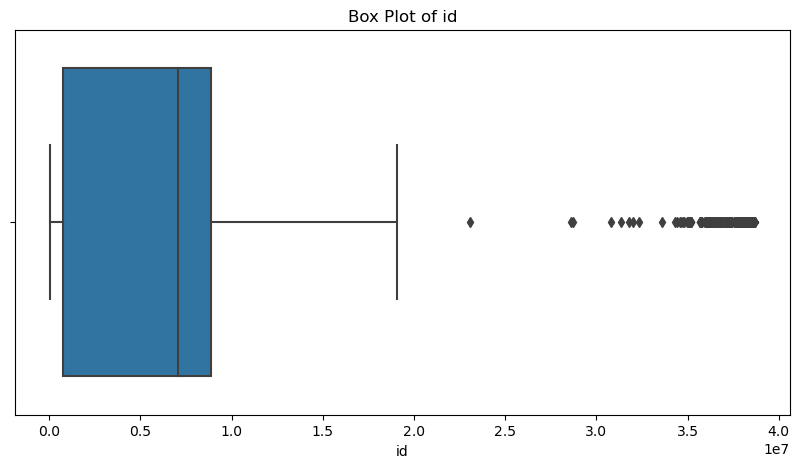

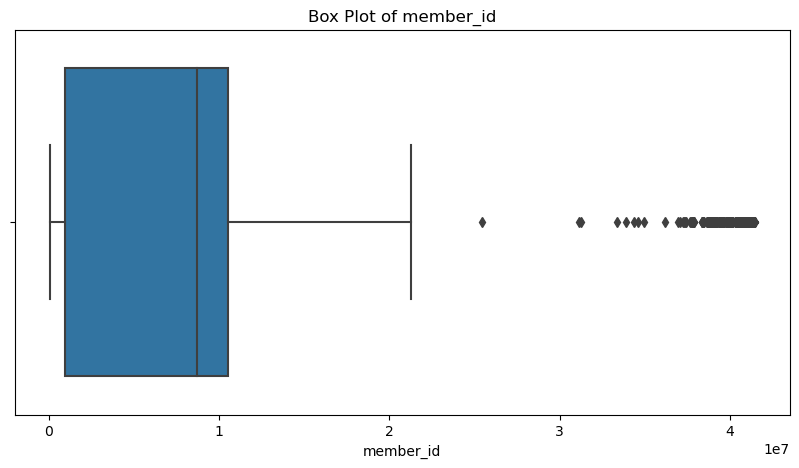

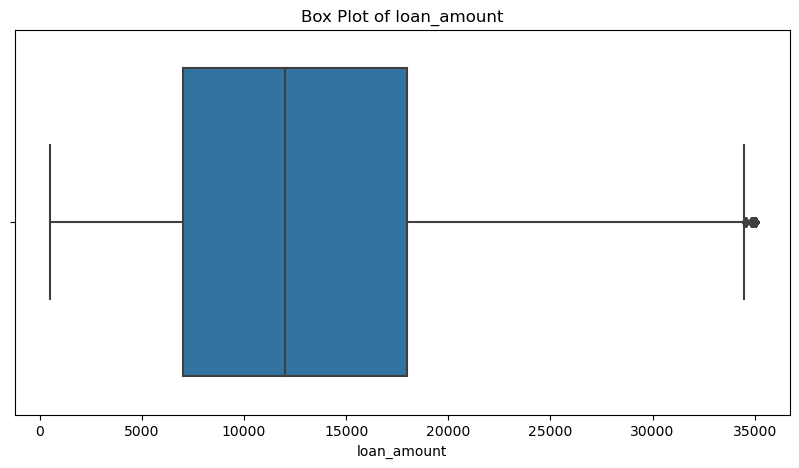

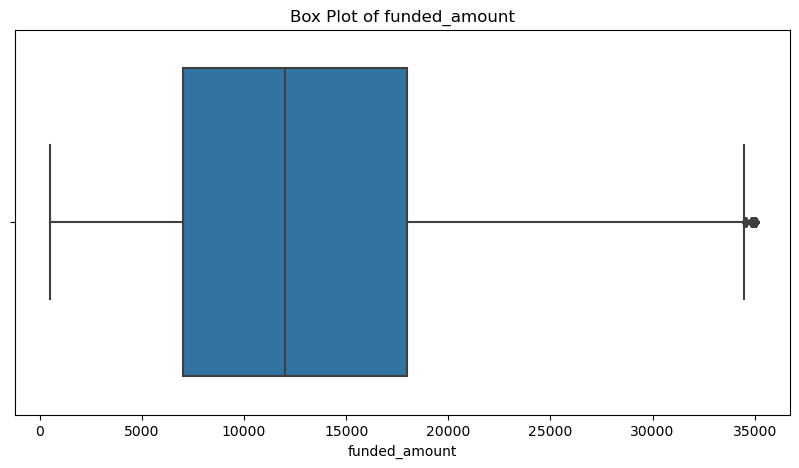

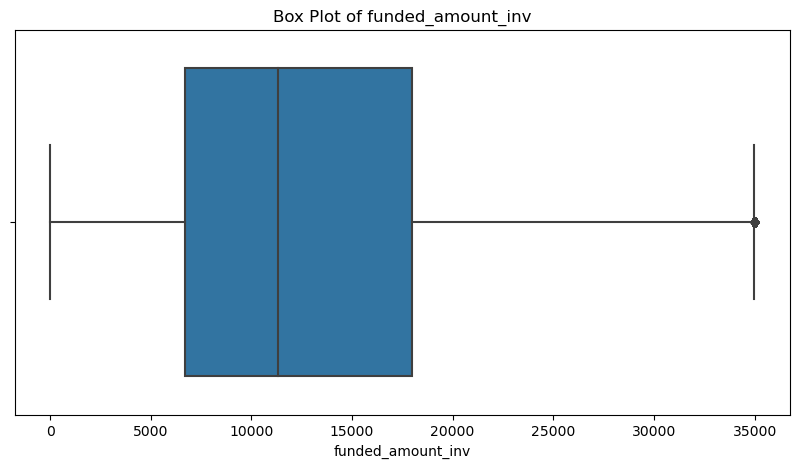

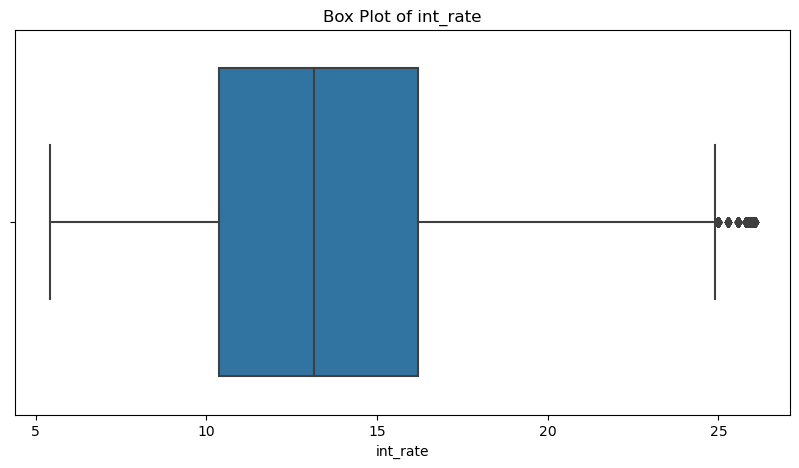

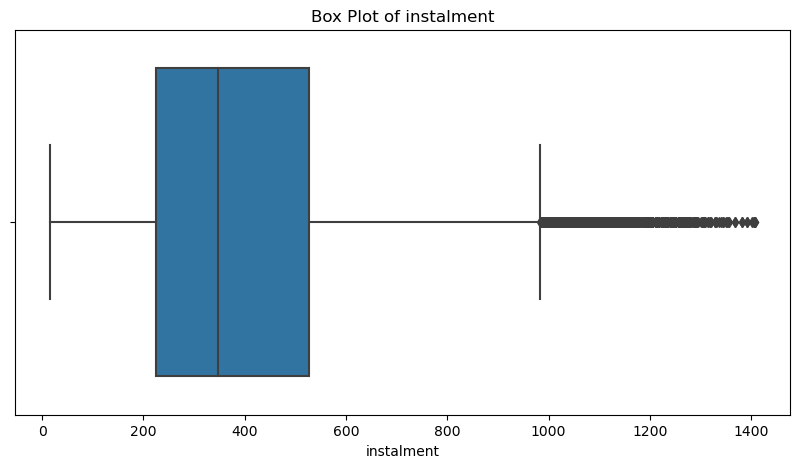

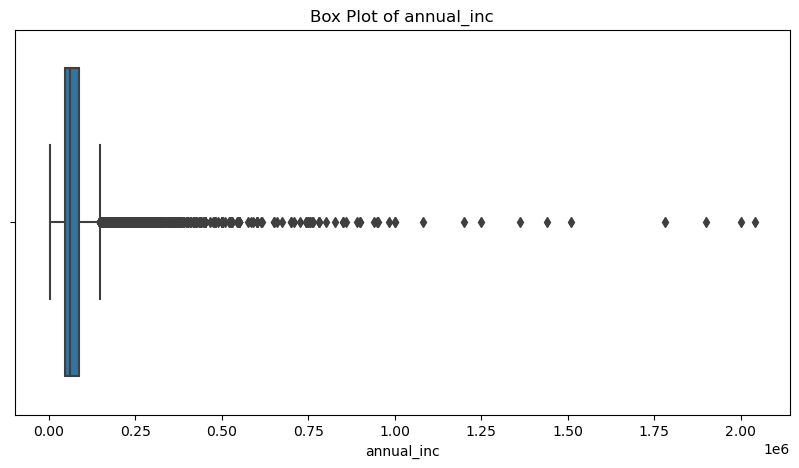

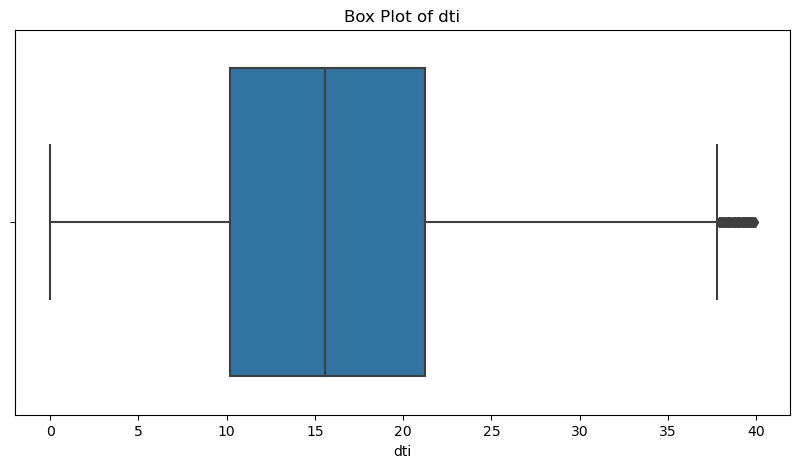

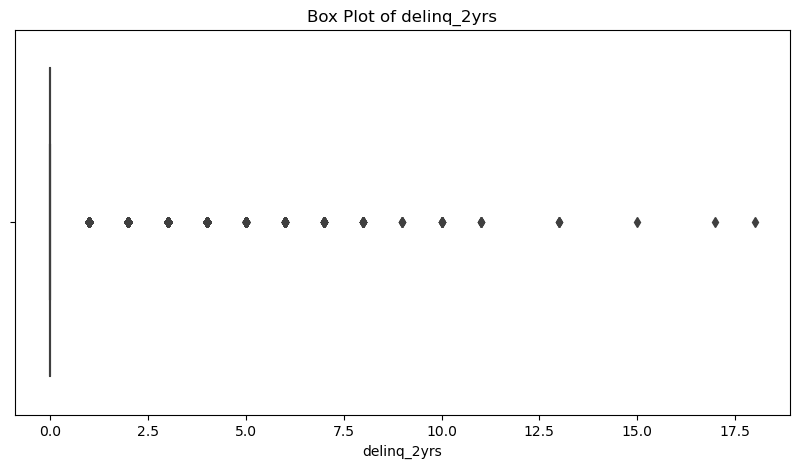

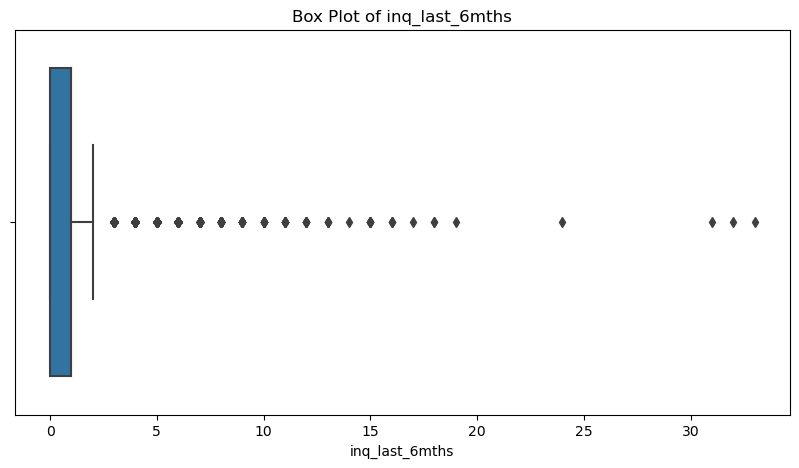

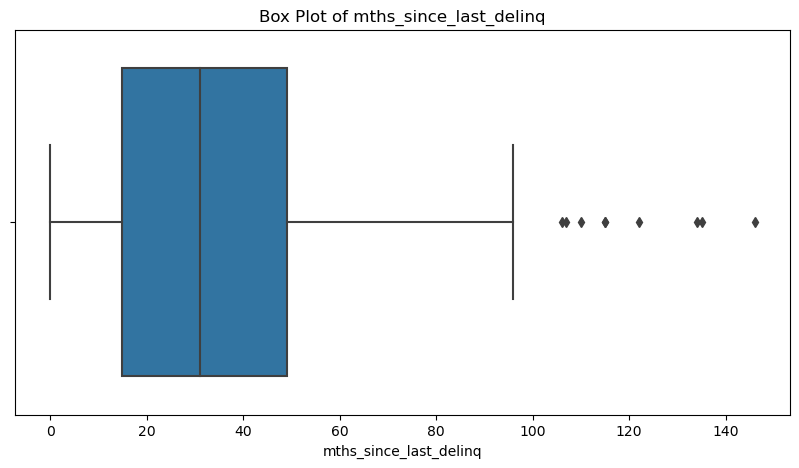

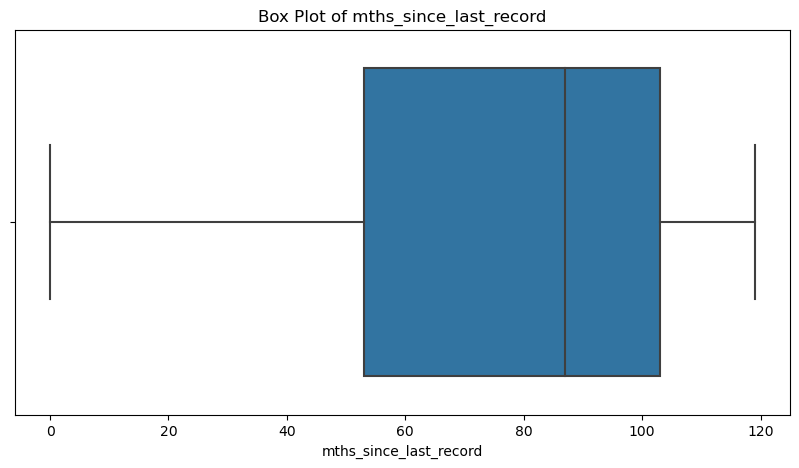

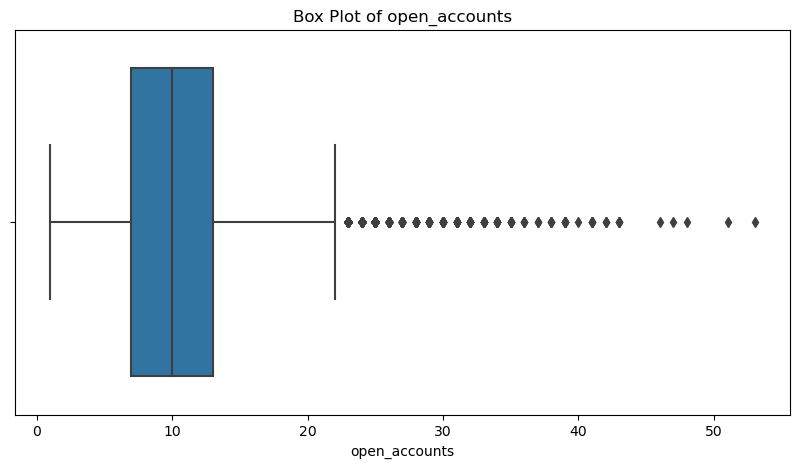

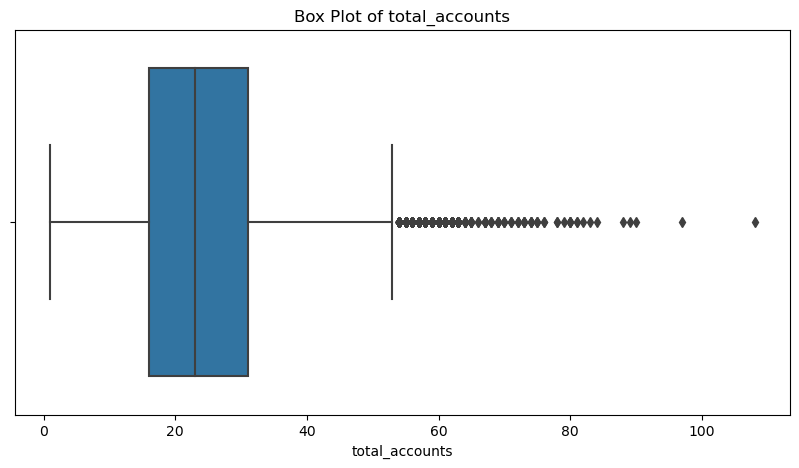

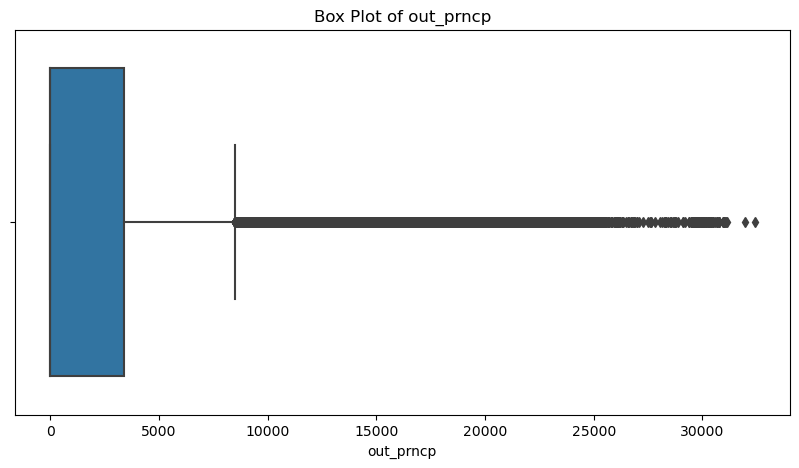

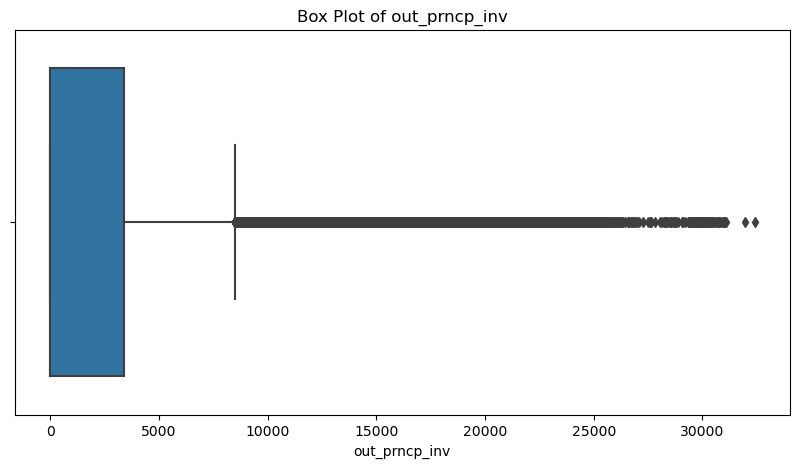

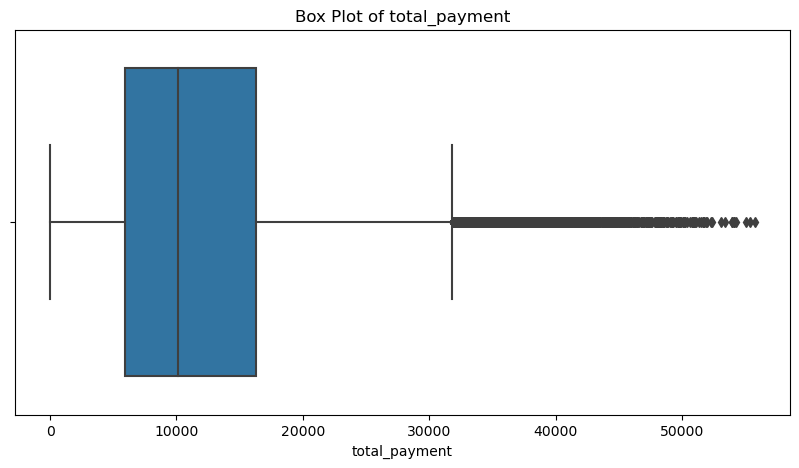

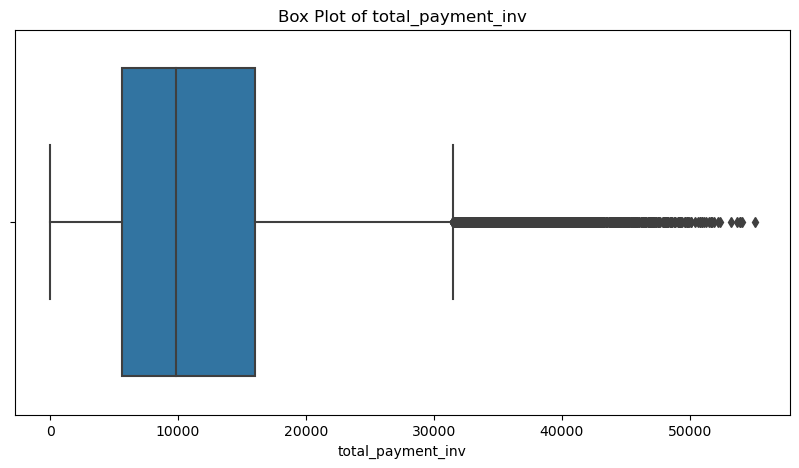

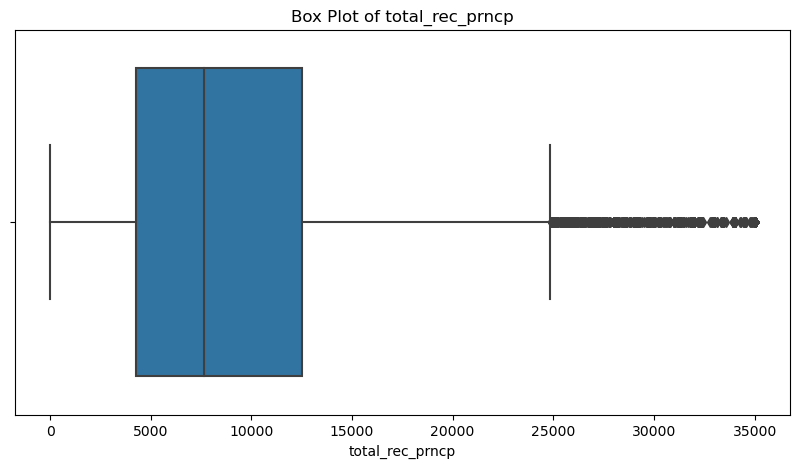

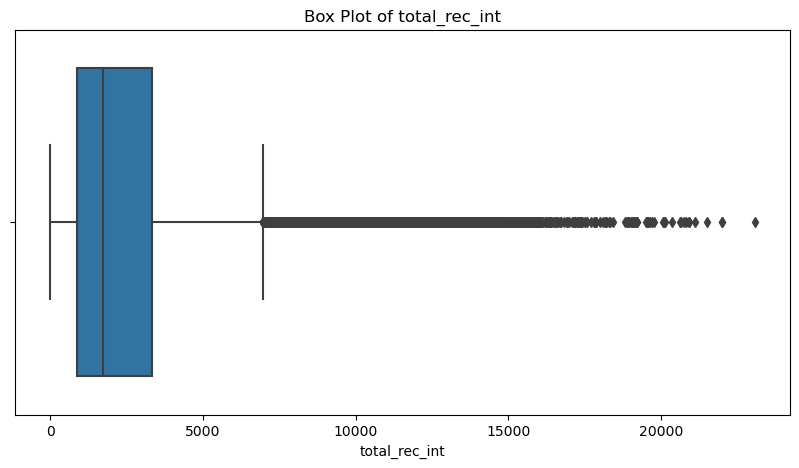

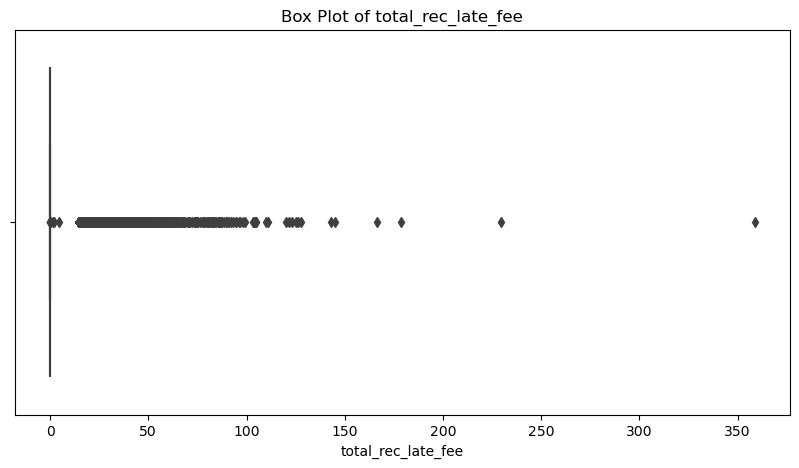

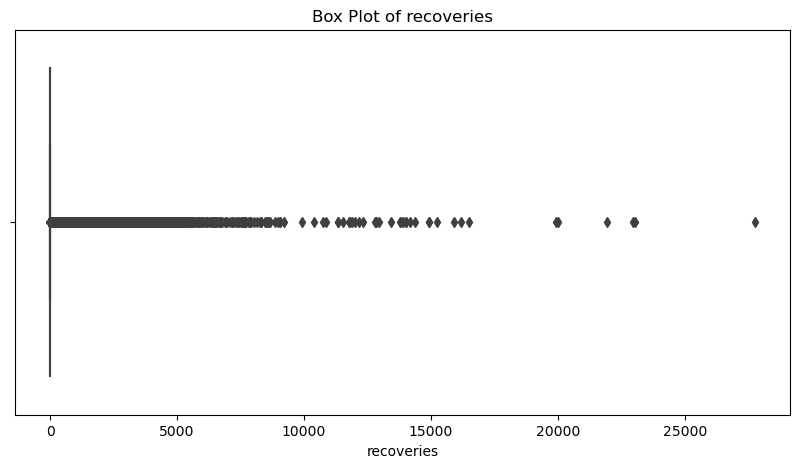

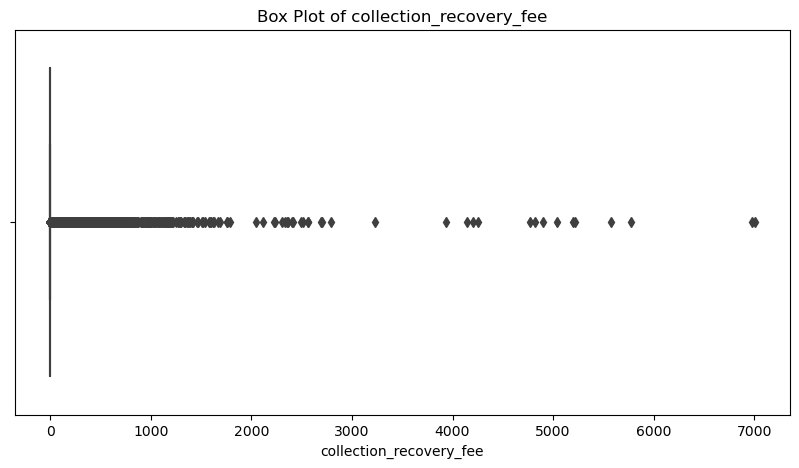

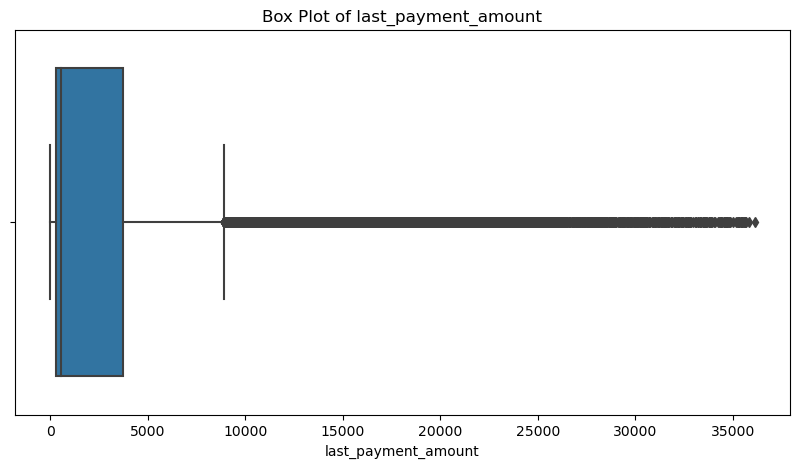

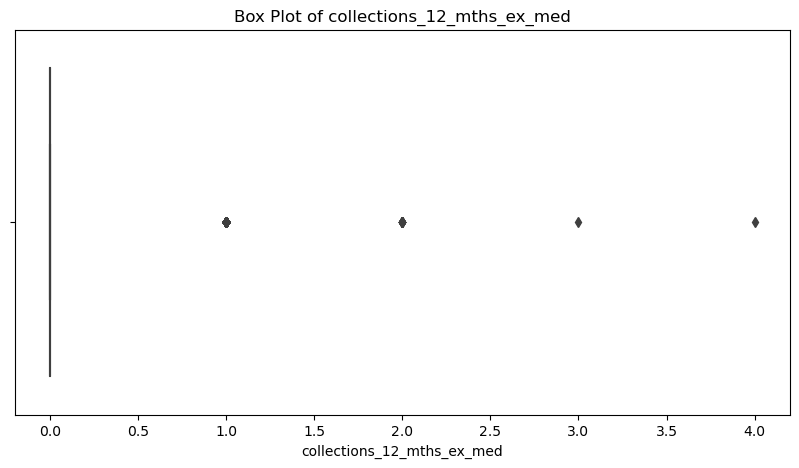

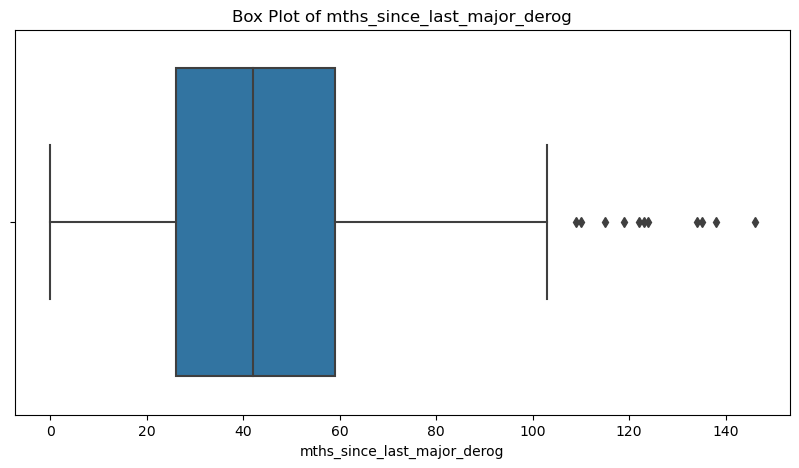

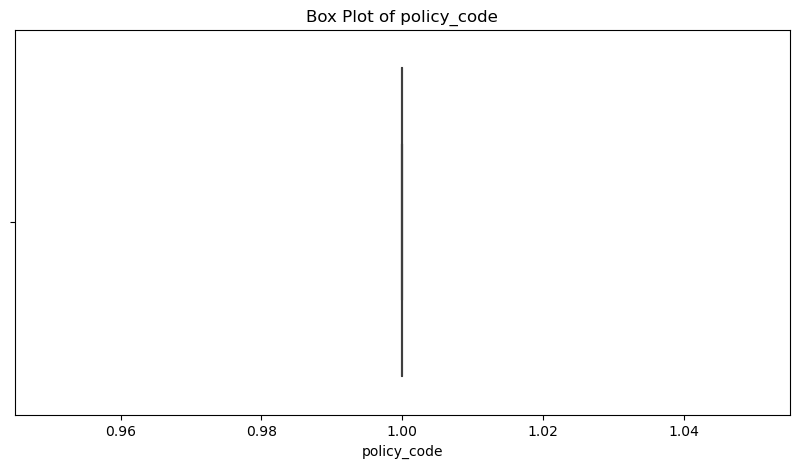

In [20]:
print("Generating box plots after outlier removal...")
plotter.plot_all_boxplots()

In [37]:
df_transform = DataFrameTransform(data_frame)

print("Before outlier removal:")
print(df_transform.df.describe())

# Remove outliers using IQR
df_transform.remove_outliers_iqr()

print("After outlier removal:")
print(df_transform.df.describe())

Before outlier removal:
                 id     member_id   loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117   
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599   
min    5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    3.867612e+07  4.146185e+07  35000.000000   35000.000000   

       funded_amount_inv      int_rate    instalment    annual_inc  \
count       54231.000000  49062.000000  54231.000000  5.423100e+04   
mean        12952.622979     13.507328    400.013953  7.222085e+04   
std          8099.473527      4.392893    238.920012  5.158934e+04   
min             0.000000      5.420000     15.670000  3.300000e+03   
25%          6700.000000     10

Generating box plots after outlier removal...


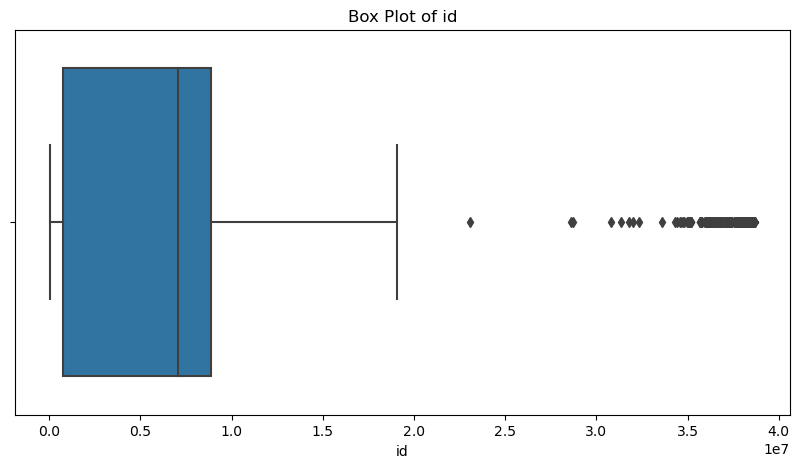

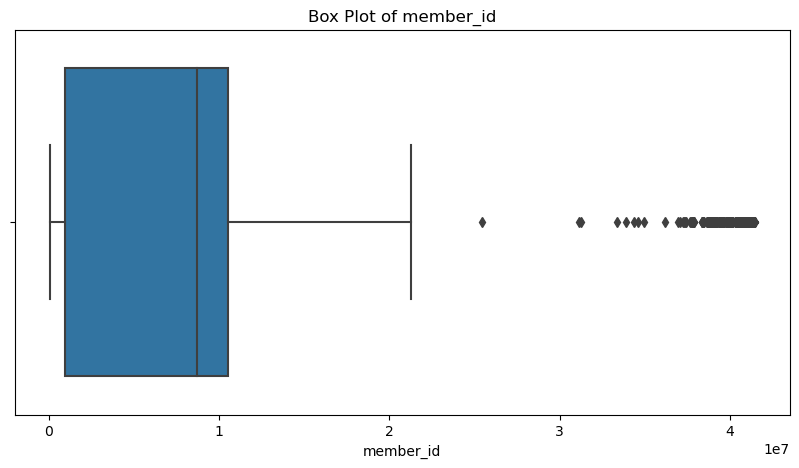

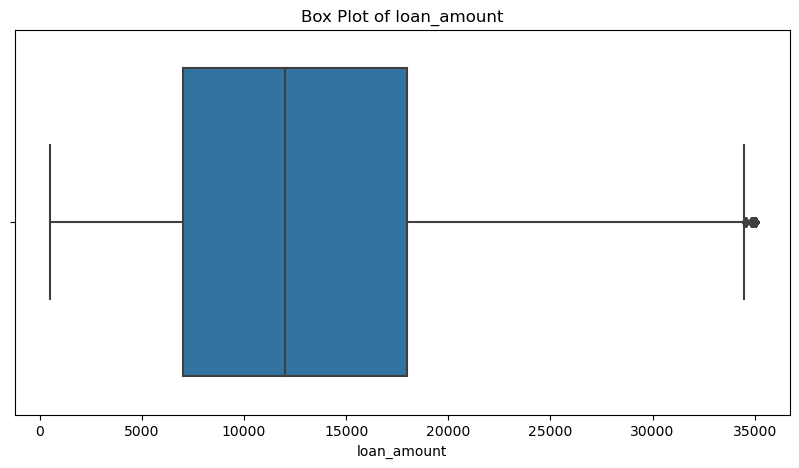

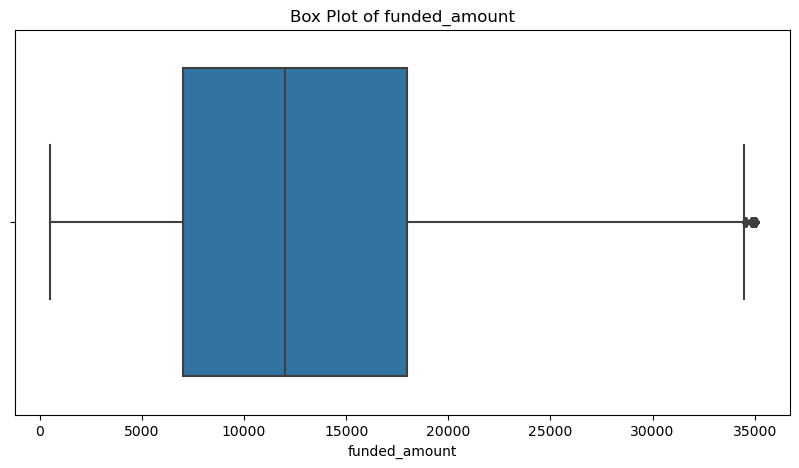

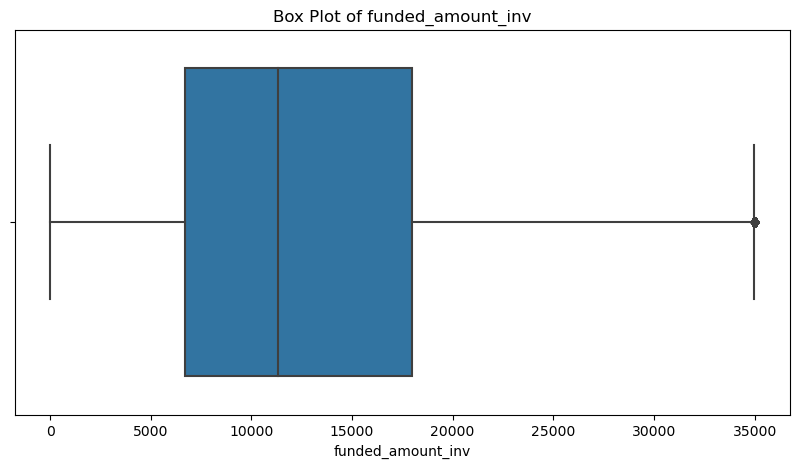

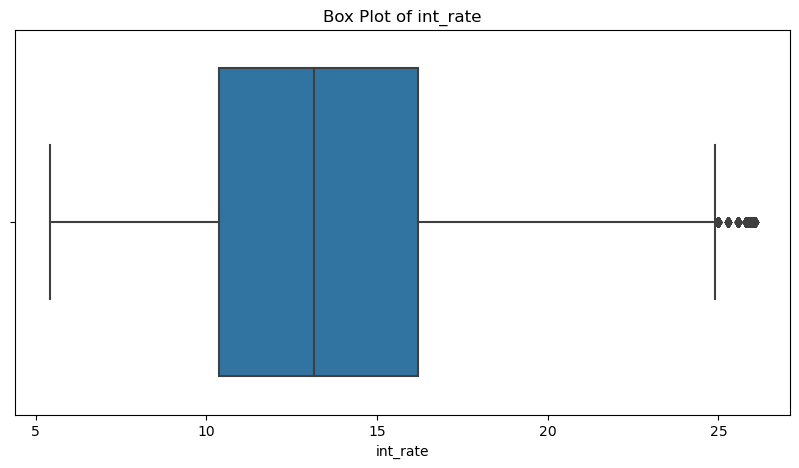

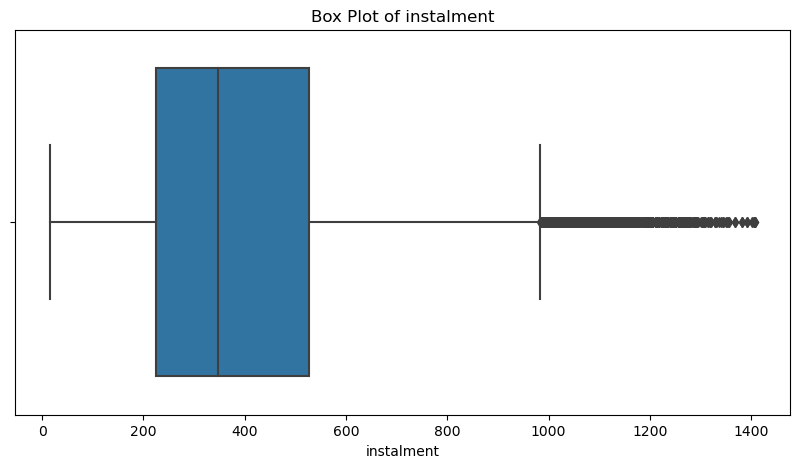

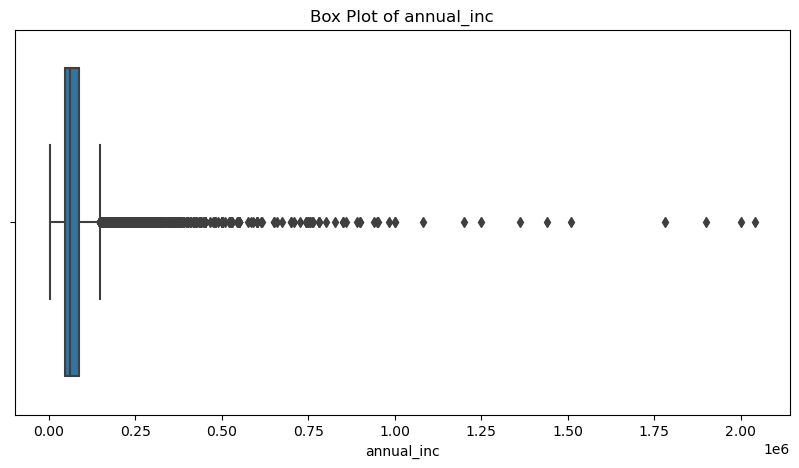

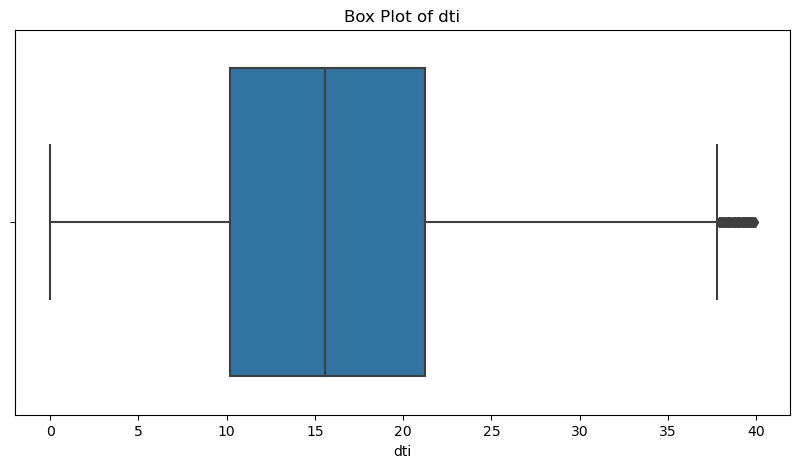

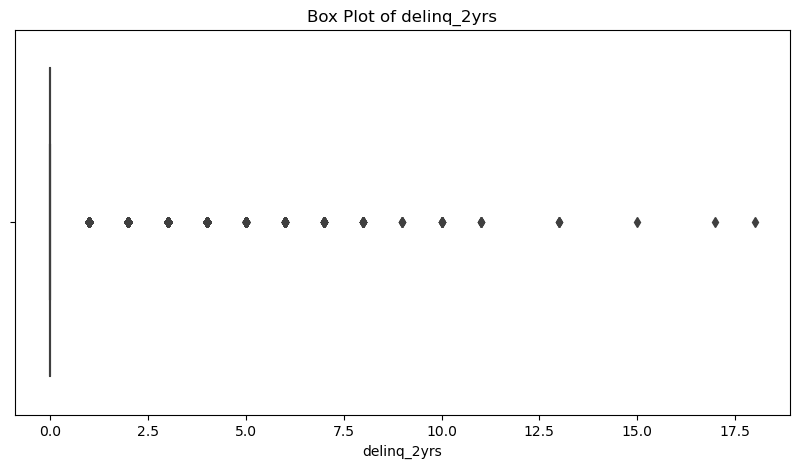

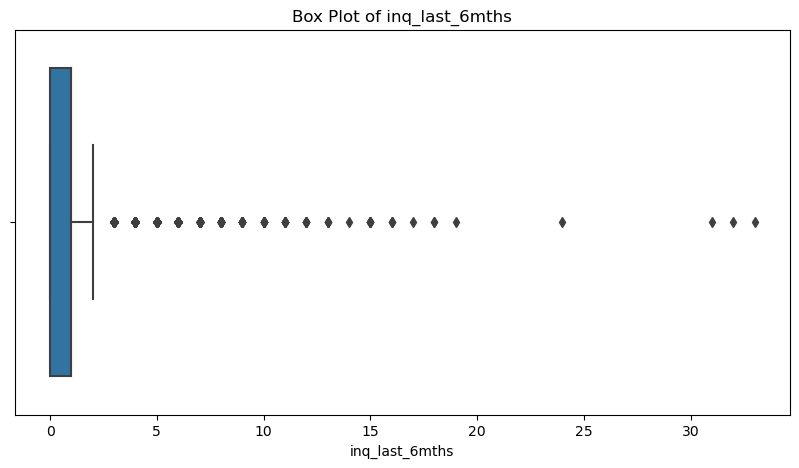

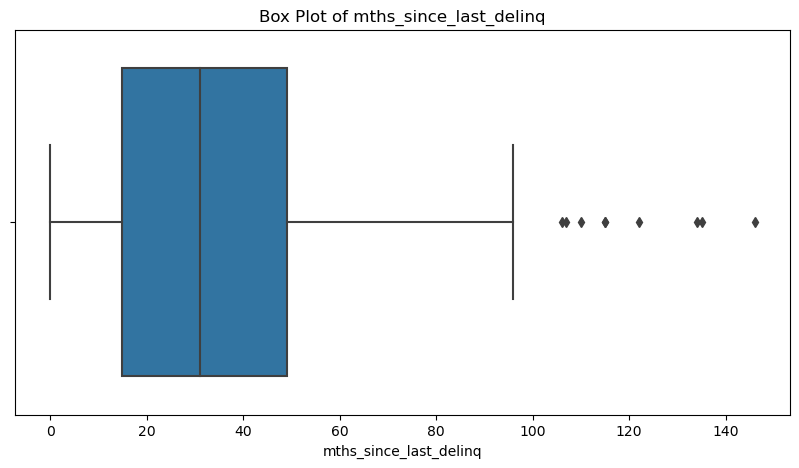

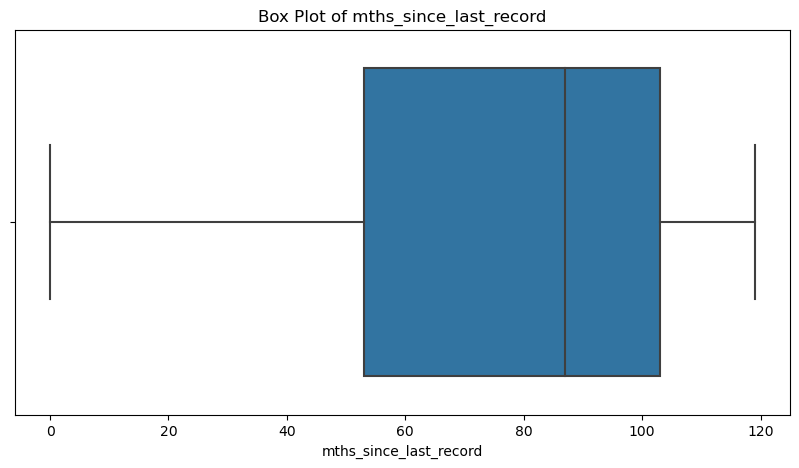

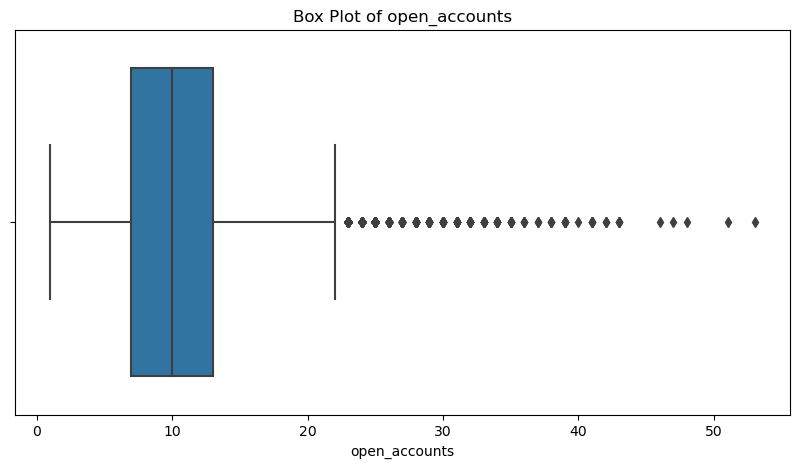

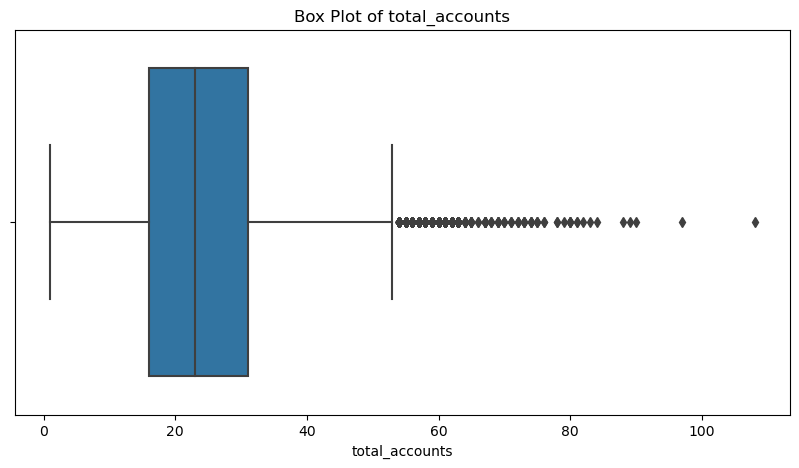

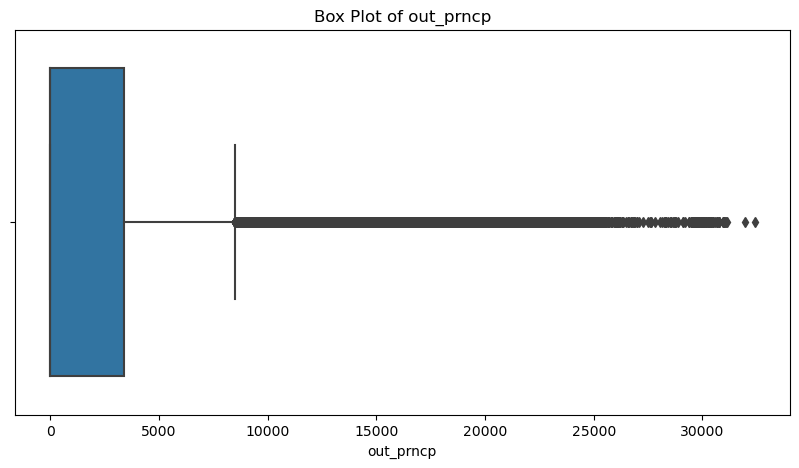

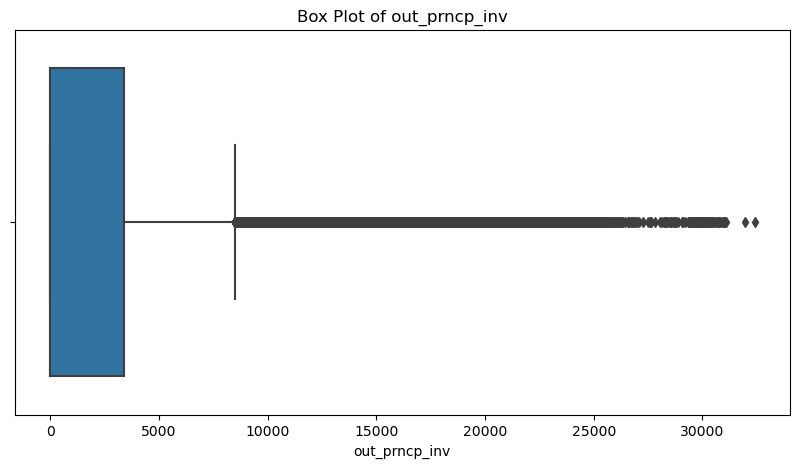

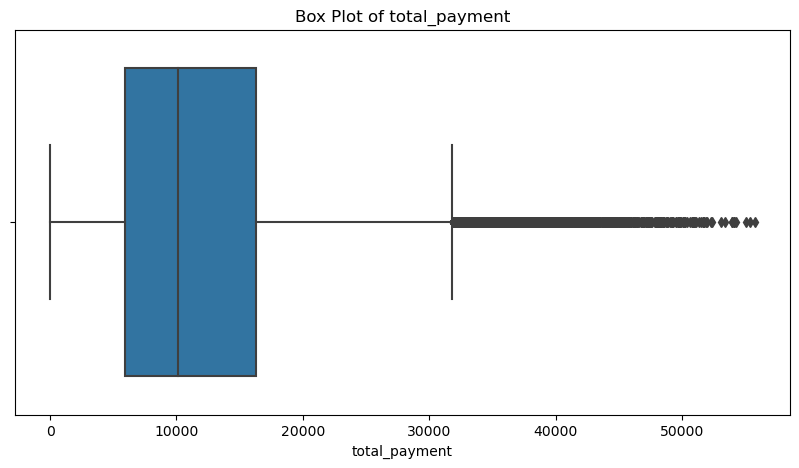

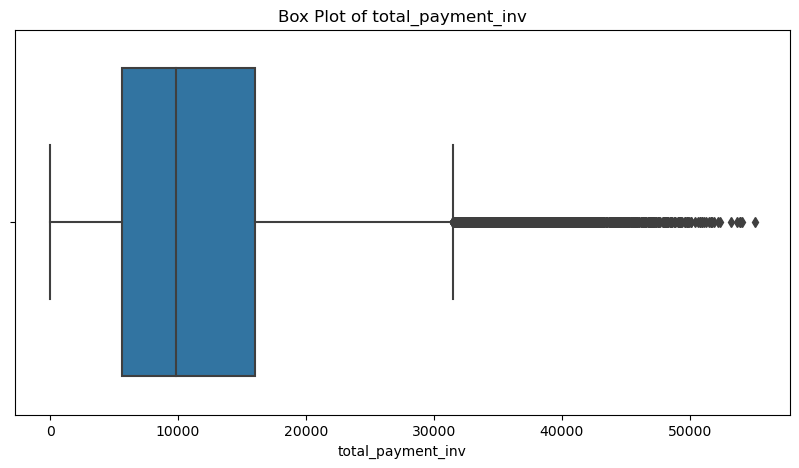

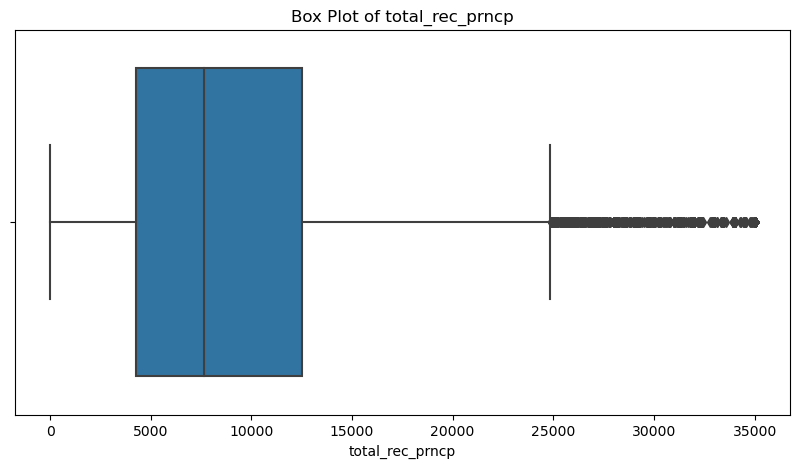

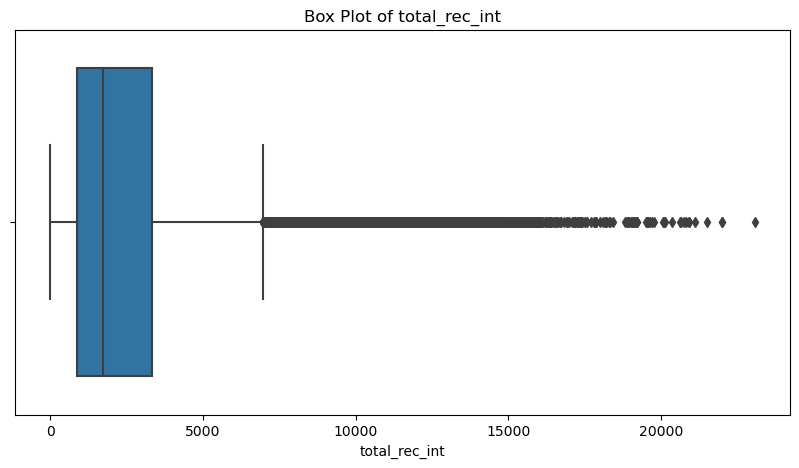

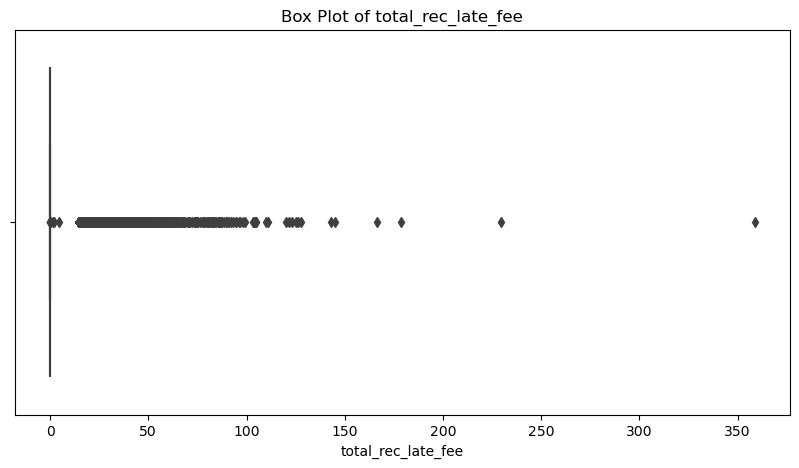

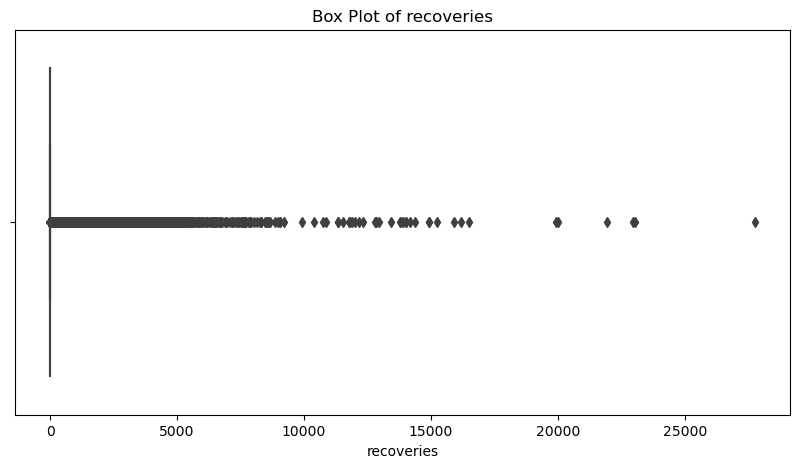

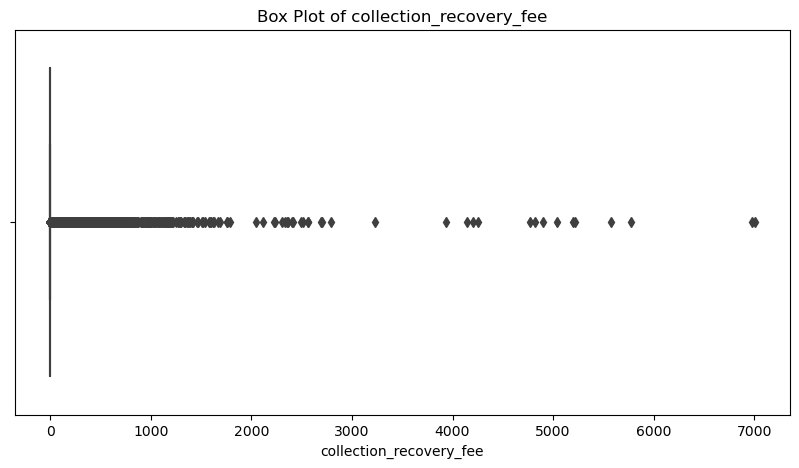

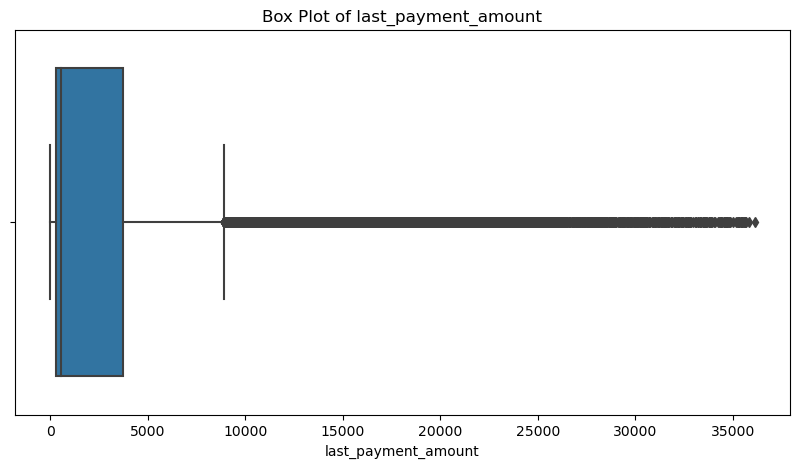

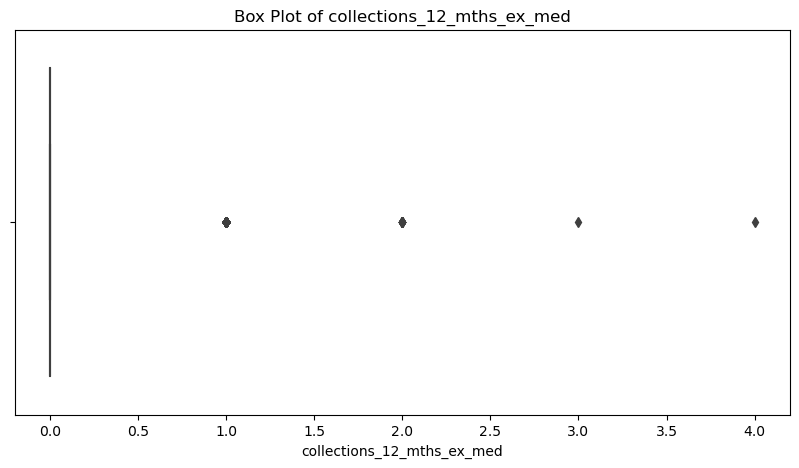

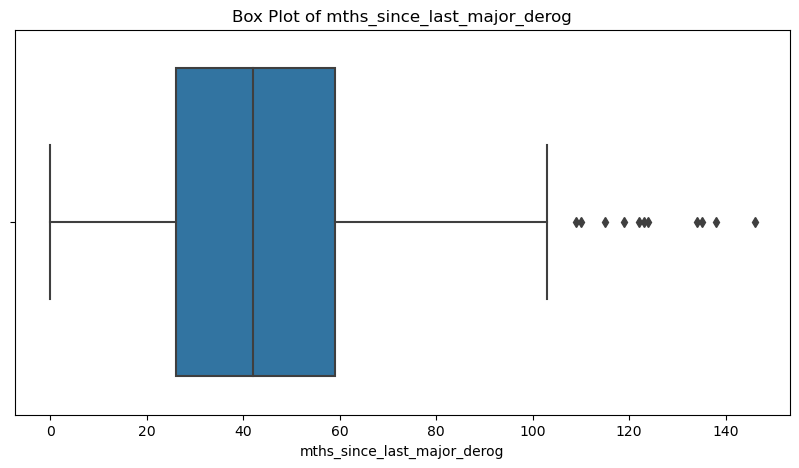

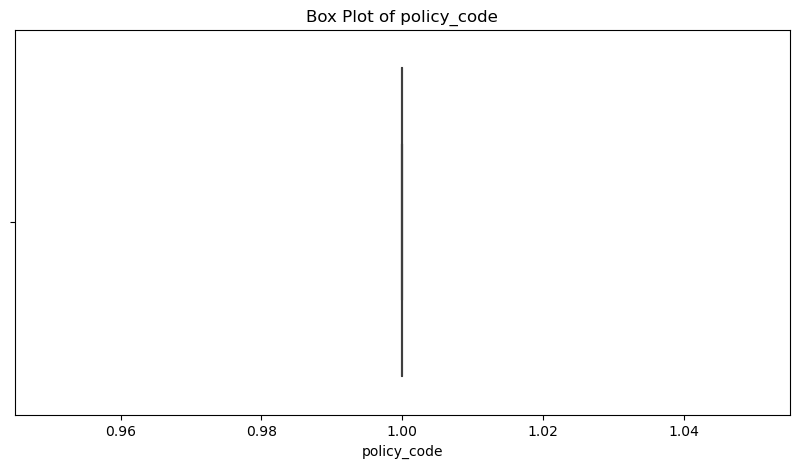

In [38]:
print("Generating box plots after outlier removal...")
plotter.plot_all_boxplots()

In [10]:
import plotly.express as px
import pandas as pd

data_frame = pd.read_csv('loan_payments.csv')
px.imshow (data_frame.corr(), title = "Correlation heatmap of customer loans dataframe.")

In [22]:
# Computing Variance Inflation Factor to confirm redunancy

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv("loan_payments.csv")  

# Select only relevant columns
df_selected = df[['loan_amount', 'funded_amount', 'funded_amount_inv']]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_selected.columns
vif_data["VIF"] = [variance_inflation_factor(df_selected.values, i) for i in range(df_selected.shape[1])]

print(vif_data)

MissingDataError: exog contains inf or nans

In [23]:
print("\nChecking for missing values before VIF calculation:")
print(df_selected.isnull().sum())


Checking for missing values before VIF calculation:
loan_amount             0
funded_amount        3007
funded_amount_inv       0
dtype: int64


In [1]:
# Import necessary libraries
import pandas as pd
import importlib
import data_cleaning
import data_analysis
import matplotlib.pyplot as plt
import seaborn as sns
from data_cleaning import DataTransform
from data_analysis import DataFrameTransform
from scipy.stats import boxcox

# Reload the modules

importlib.reload(data_cleaning)
importlib.reload(data_analysis)

# Remove rows with missing values from funded_amount
df = pd.read_csv('loan_payments.csv')
df_transform = DataFrameTransform(df)
df_transform.drop_rows_with_missing_funded_amount()

# Select only relevant columns
df_selected = df[['loan_amount', 'funded_amount', 'funded_amount_inv']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_selected.columns
vif_data["VIF"] = [variance_inflation_factor(df_selected.values, i) for i in range(df_selected.shape[1])]

print(vif_data)

Index(['Charged Off', 'Current', 'Does not meet the credit policy',
       'Fully Paid', 'Late', 'Unknown'],
      dtype='object')
0    1
1    1
2    1
3    3
4    1
Name: grade, dtype: int64
Index(['Charged Off', 'Current', 'Does not meet the credit policy',
       'Fully Paid', 'Late', 'Unknown'],
      dtype='object')
0    1
1    1
2    1
3    3
4    1
Name: grade, dtype: int64

Dropped rows with missing values in 'funded_amount'.
             Feature         VIF
0        loan_amount  309.037520
1      funded_amount  433.279211
2  funded_amount_inv  102.521399


In [4]:
# Import necessary modules
import pandas as pd
import importlib
import data_analysis
from data_analysis import DataFrameTransform

# Reload the module to ensure updates take effect
importlib.reload(data_analysis)

# Load the dataset
df = pd.read_csv('loan_payments.csv')

# Initialize the transformation class
df_transform = DataFrameTransform(df)

# Drop rows with missing 'funded_amount'
df_transform.drop_rows_with_missing_funded_amount()

# Drop highly correlated columns
df_transform.drop_highly_correlated_columns(['loan_amount', 'funded_amount_inv'])

# Get the transformed DataFrame
df_cleaned = df_transform.get_dataframe()

# Display the first few rows
df_cleaned.head()

Dropped rows with missing values in 'funded_amount'.
Dropped highly correlated columns: ['loan_amount', 'funded_amount_inv']


id  member_id  funded_amount       term  int_rate  instalment grade  \
0  38676116   41461848         8000.0  36 months      7.49      248.82     A   
1  38656203   41440010        13200.0  36 months      6.99      407.52     A   
2  38656154   41439961        16000.0  36 months      7.49      497.63     A   
3  38656128   41439934        15000.0  36 months     14.31      514.93     C   
4  38656121   41439927        15000.0  36 months      6.03      456.54     A   

  sub_grade employment_length home_ownership  ...  recoveries  \
0        A4           5 years       MORTGAGE  ...         0.0   
1        A3           9 years           RENT  ...         0.0   
2        A4           8 years       MORTGAGE  ...         0.0   
3        C4            1 year           RENT  ...         0.0   
4        A1         10+ years       MORTGAGE  ...         0.0   

  collection_recovery_fee last_payment_date last_payment_amount  \
0                     0.0          Jan-2022              248.82   
1                     0.0          Jan-2022              407.52   
2                     0.0          Oct-2021            12850.16   
3                     0.0          Jun-2021            13899.67   
4                     0.0          Jan-2022              456.54   

  next_payment_date last_credit_pull_date  collections_12_mths_ex_med  \
0          Feb-2022              Jan-2022                         0.0   
1          Feb-2022              Jan-2022                         0.0   
2               NaN              Oct-2021                         0.0   
3               NaN              Jun-2021                         0.0   
4          Feb-2022              Jan-2022                         0.0   

   mths_since_last_major_derog policy_code  application_type  
0                          5.0           1        INDIVIDUAL  
1                          NaN           1        INDIVIDUAL  
2                          NaN           1        INDIVIDUAL  
3                          NaN           1        INDIVIDUAL  
4                          NaN           1        INDIVIDUAL  

[5 rows x 41 columns]

In [3]:
# Percentage of loans that have been currently recovered compared to total amount to be paid over the loans term including interest
import pandas as pd
df = pd.read_csv('loan_payments.csv')

df['total_recovered'] = df['total_rec_prncp'] + df['total_rec_int']

df['recovery_pct'] = (df['total_recovered'] / df['total_payment']) * 100

overall_recovery_pct = df['recovery_pct'].mean()
print(f"Overall recovery percentage: {overall_recovery_pct:.2f}%")

Overall recovery percentage: 98.47%


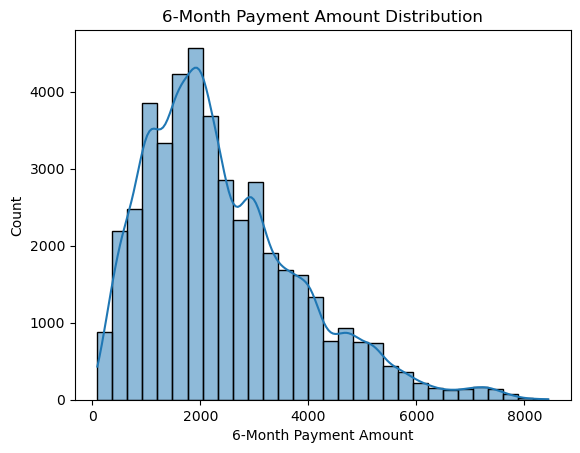

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data_cleaning import DataTransform


# Read the CSV file
df = pd.read_csv('loan_payments.csv')

# Instantiate the class with the DataFrame
transformer = DataTransform(df)

# Convert the term column to numeric values e.g. '6 months' to 6
transformer.convert_term()

# Calculate monthly interest rate: converting int_rate from percentage to decimal and dividing by 12
transformer.df['monthly_rate'] = (transformer.df['int_rate'] / 100) / 12

# Calculate the monthly payment using the amortisation formula
df['monthly_payment'] = (df['monthly_rate'] * df['loan_amount']) / (1 - (1 + df['monthly_rate']) ** (-df['term_months']))

# Calculate the total amount paid in 6 months
transformer.df['payment_6_months'] = transformer.df['monthly_payment'] * 6

# Visualise the distribution of the 6-month payment amounts
sns.histplot(df['payment_6_months'], bins=30, kde=True)
plt.title("6-Month Payment Amount Distribution")
plt.xlabel("6-Month Payment Amount")
plt.ylabel("Count")
plt.show()

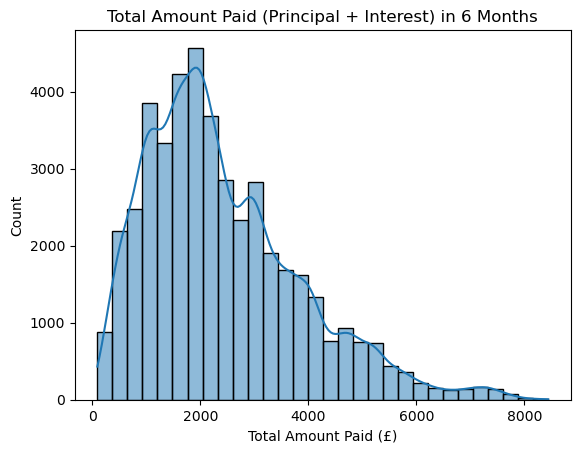

total_interest_6_months  total_principal_6_months  total_paid_6_months
count             4.906200e+04              4.906200e+04         44757.000000
mean                      -inf                       inf          2417.400572
std                        NaN                       NaN          1439.224307
min                       -inf              5.269518e+01            94.009096
25%               3.062345e+02              8.827509e+02          1363.517451
50%               6.163779e+02              1.412139e+03          2097.887567
75%               1.127429e+03              2.252039e+03          3200.688791
max               4.463562e+03                       inf          8442.024523

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data_cleaning import DataTransform  # Assuming your class is in 'data_cleaning.py'

# Read the CSV file
df = pd.read_csv('loan_payments.csv')

# Instantiate the class with the DataFrame
transformer = DataTransform(df)

# Convert the 'term' column to numeric values
transformer.convert_term()

# Convert interest rate from percentage to decimal and calculate monthly interest rate
transformer.df['monthly_rate'] = (transformer.df['int_rate'] / 100) / 12

# Use the amortization formula to calculate the fixed monthly payment
df['monthly_payment'] = (df['monthly_rate'] * df['loan_amount']) / (1 - (1 + df['monthly_rate']) ** (-df['term_months']))

# Initialize columns for tracking interest and principal over 6 months
df['total_interest_6_months'] = 0
df['total_principal_6_months'] = 0
df['remaining_balance'] = df['loan_amount']

# Loop over 6 months to calculate payments
for _ in range(6):
    df['interest_payment'] = df['remaining_balance'] * df['monthly_rate']  # Interest for the month
    df['principal_payment'] = df['monthly_payment'] - df['interest_payment']  # Principal paid
    df['remaining_balance'] -= df['principal_payment']  # Update remaining balance
    df['total_interest_6_months'] += df['interest_payment']  # Accumulate interest paid
    df['total_principal_6_months'] += df['principal_payment']  # Accumulate principal paid

# Calculate total paid in 6 months (principal + interest)
df['total_paid_6_months'] = df['total_interest_6_months'] + df['total_principal_6_months']

# Visualize the distribution of the total amount paid in 6 months
sns.histplot(df['total_paid_6_months'], bins=30, kde=True)
plt.title("Total Amount Paid (Principal + Interest) in 6 Months")
plt.xlabel("Total Amount Paid (£)")
plt.ylabel("Count")
plt.show()

# Optional: Print summary statistics
df[['total_interest_6_months', 'total_principal_6_months', 'total_paid_6_months']].describe()

In [20]:
df = pd.read_csv('loan_payments.csv')

print(df['loan_status'])
print(df['loan_status'].value_counts().get('Charged Off', 0))

0                                                  Current
1                                                  Current
2                                               Fully Paid
3                                               Fully Paid
4                                                  Current
                               ...                        
54226                                           Fully Paid
54227                                           Fully Paid
54228    Does not meet the credit policy. Status:Fully ...
54229                                           Fully Paid
54230    Does not meet the credit policy. Status:Charge...
Name: loan_status, Length: 54231, dtype: object
5571


In [28]:
import pandas as pd

df = pd.read_csv('loan_payments.csv')

# Create a variable for number of charged of loans, store as a Boolean
charged_off_count = df[df['loan_status'] == 'Charged Off'].shape[0]

total_loans = df.shape[0]

percentage_charged_off = (charged_off_count / total_loans) * 100
print(f"Perentage of Charged Off loans: {percentage_charged_off:.2f}%")

# Make a variable for the value you want to find a percentage for AND create a Boolean series marking True for rows where the column has that value, and False otherwise
# Filter the DataFrame so that the Boolean series is used as a filter and the DataFrame keeps only the rows where the Boolean series is True
# Count the filtered rows using .shape[0]
# Find the total number of the column e.g. number of loans using variable_name = df.shape[0]
# Divide desired variable total by total of column and x 100

Perentage of Charged Off loans: 10.27%


Total Expected Loss: £76,359,400.00
Total Loss Remaining: £38,958,810.96


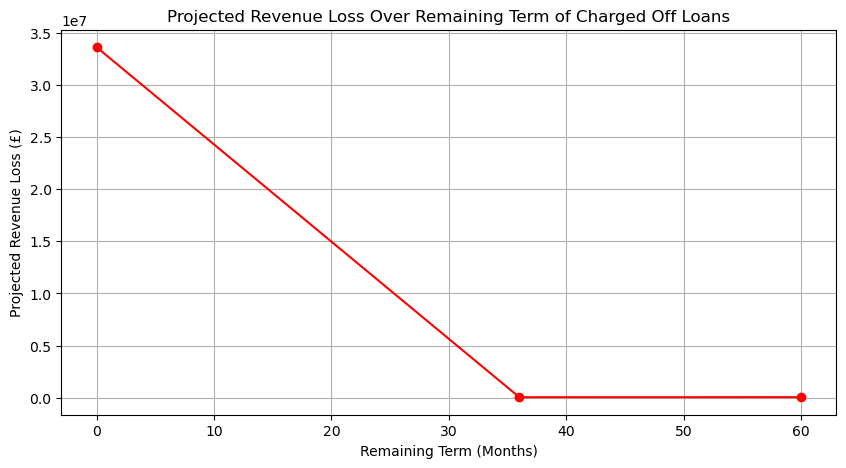

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('loan_payments.csv')

# Filter for charged off loans and make a copy
charged_off_loans = df[df['loan_status'] == 'Charged Off'].copy()

# Convert 'term' to numeric
charged_off_loans['term'] = charged_off_loans['term'].str.extract('(\d+)').astype(float)

# Calculate remaining term
charged_off_loans['remaining_term'] = charged_off_loans['term'] - (charged_off_loans['last_payment_date'].notna().astype(int) * charged_off_loans['term'])

# Calculate the expected total loan value (based on original loan amount)
expected_loss = charged_off_loans['loan_amount'].sum()
print(f"Total Expected Loss: £{expected_loss:,.2f}")

# Calculate loss already paid vs remaining loss
actual_recovered = charged_off_loans['total_payment'].sum()  # Ensure 'total_payment' exists
remaining_loss = expected_loss - actual_recovered
print(f"Total Loss Remaining: £{remaining_loss:,.2f}")

# Group by remaining term and sum up the remaining loss
loss_by_term = charged_off_loans.groupby('remaining_term')['total_payment'].sum()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(loss_by_term.index, loss_by_term.values, marker='o', linestyle='-', color='red')
plt.xlabel("Remaining Term (Months)")
plt.ylabel("Projected Revenue Loss (£)")
plt.title("Projected Revenue Loss Over Remaining Term of Charged Off Loans")
plt.grid(True)
plt.show()
